In [1]:
from useful_scit.imps import *
from check_input_01_funs import * 

In [2]:
path = '/Volumes/mbProD/Downloads/wrf_small_files'

In [3]:
glob.glob(path+'/wrf*')

['/Volumes/mbProD/Downloads/wrf_small_files/wrfbdy_d0_short',
 '/Volumes/mbProD/Downloads/wrf_small_files/wrffdda_d0_short',
 '/Volumes/mbProD/Downloads/wrf_small_files/wrfinput_d01',
 '/Volumes/mbProD/Downloads/wrf_small_files/wrflowinp_d01']

In [4]:
file_path = os.path.join(path,'wrfinput_d01')

In [11]:
xa = xr.open_dataset(file_path).isel(Time=0)
list(xa.dims)

['DIM0010',
 'bottom_top',
 'bottom_top_stag',
 'dust_erosion_dimension',
 'land_cat_stag',
 'num_ext_model_couple_dom_stag',
 'soil_cat_stag',
 'soil_layers_stag',
 'south_north',
 'south_north_stag',
 'west_east',
 'west_east_stag']

In [12]:
xa.coords

Coordinates:
    XLAT     (south_north, west_east) float32 ...
    XLONG    (south_north, west_east) float32 ...
    XLAT_U   (south_north, west_east_stag) float32 ...
    XLONG_U  (south_north, west_east_stag) float32 ...
    XLAT_V   (south_north_stag, west_east) float32 ...
    XLONG_V  (south_north_stag, west_east) float32 ...

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


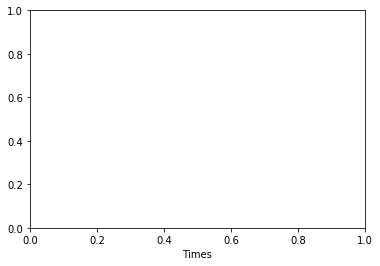

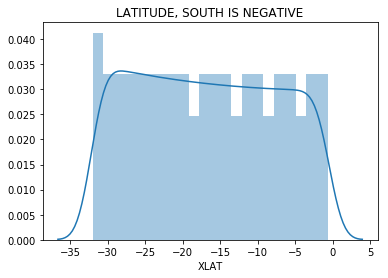

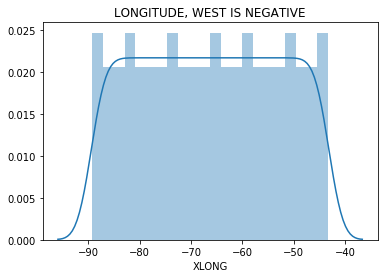

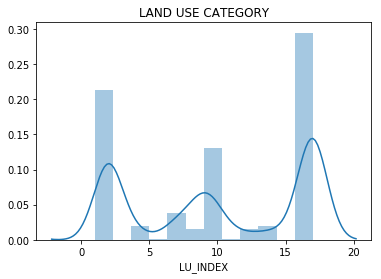

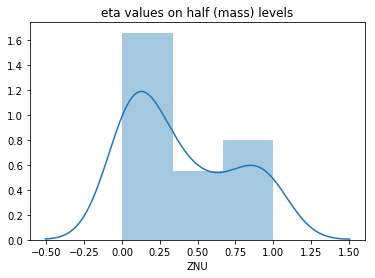

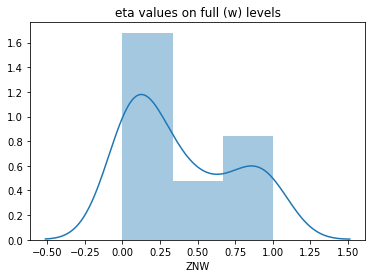

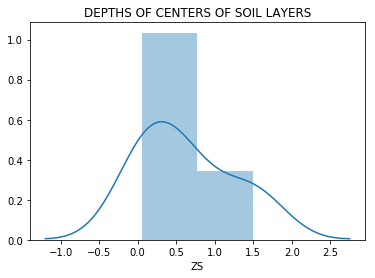

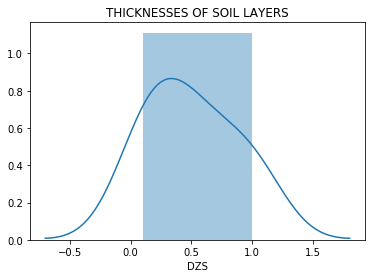

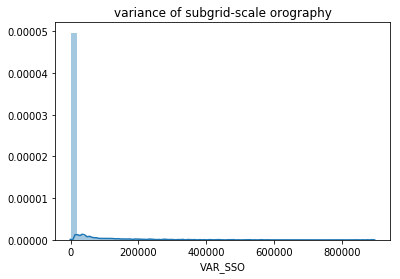

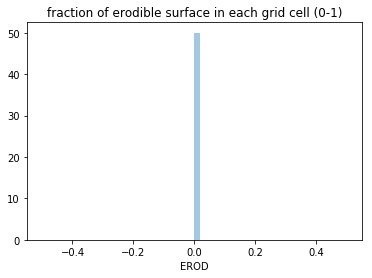

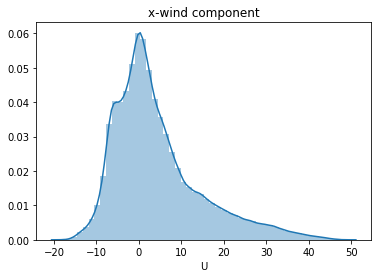

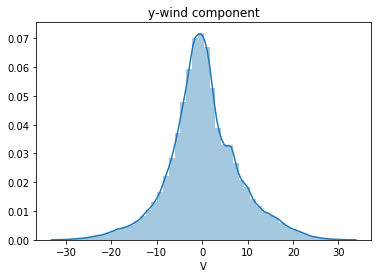

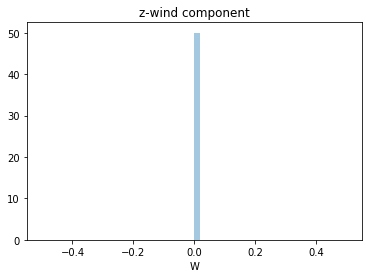

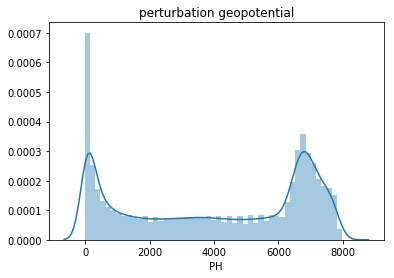

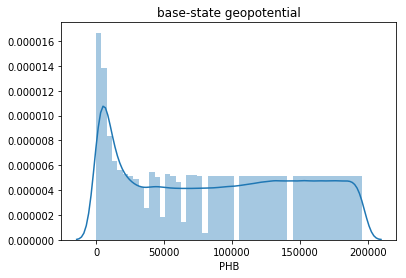

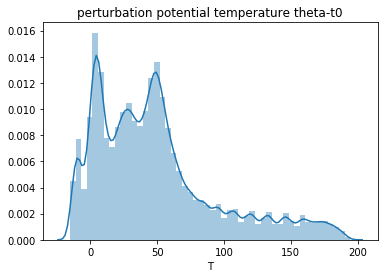

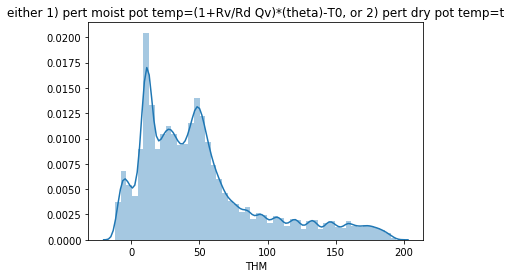

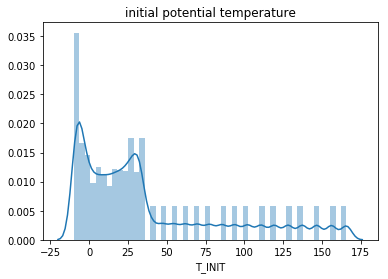

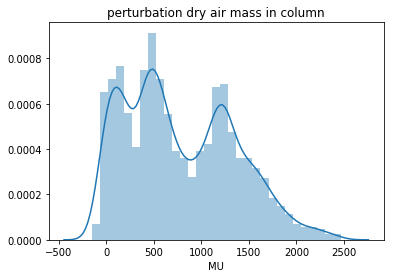

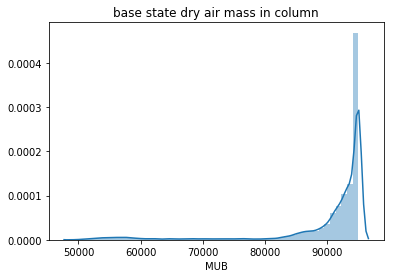

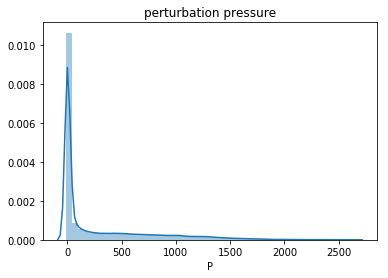

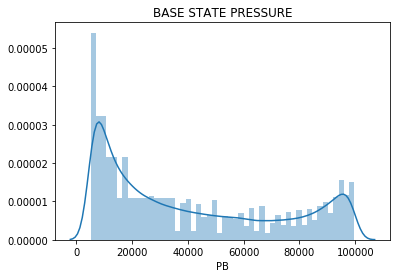

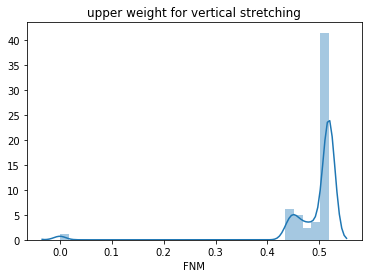

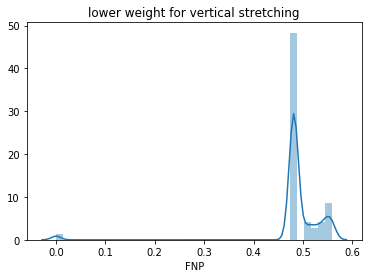

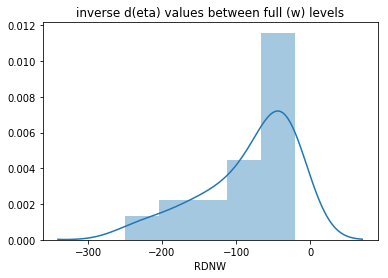

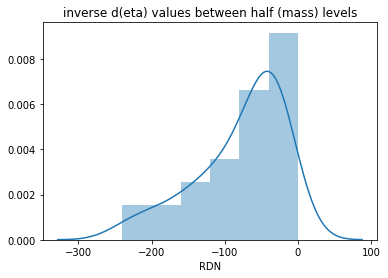

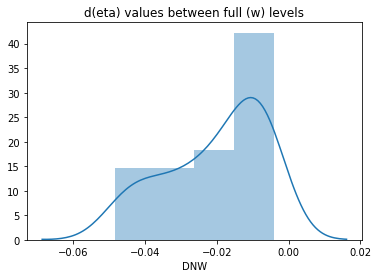

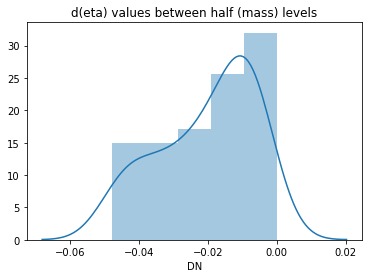

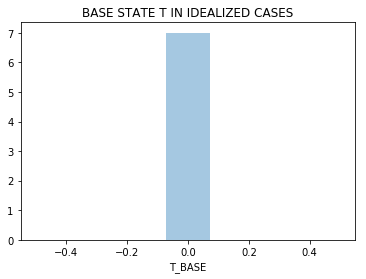

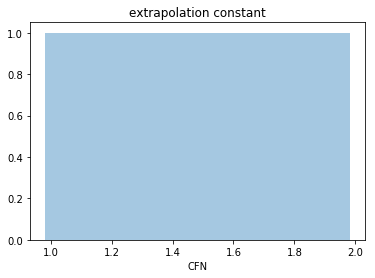

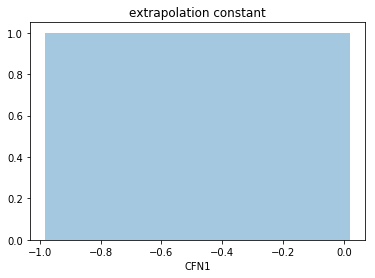

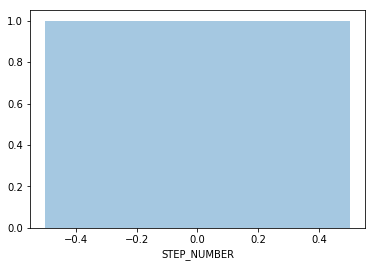

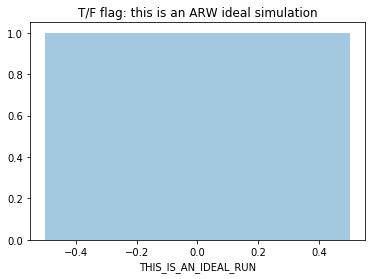

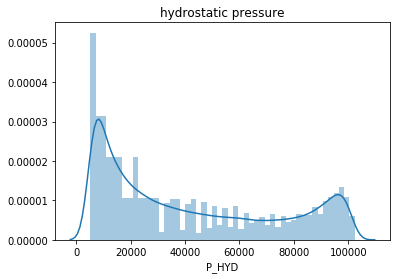

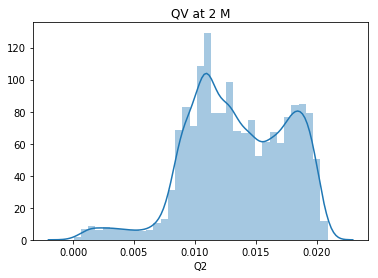

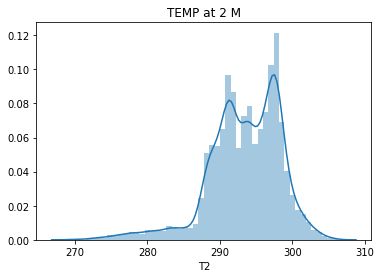

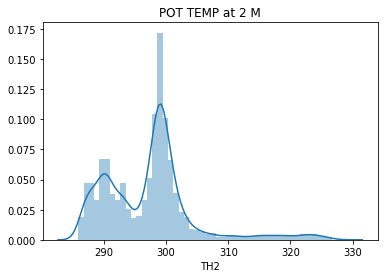

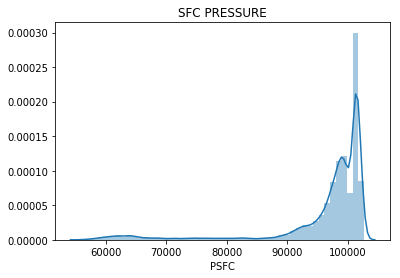

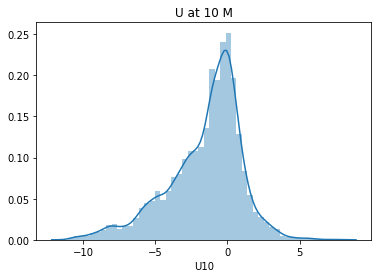

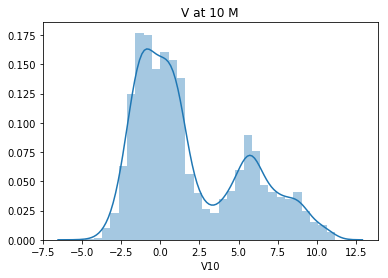

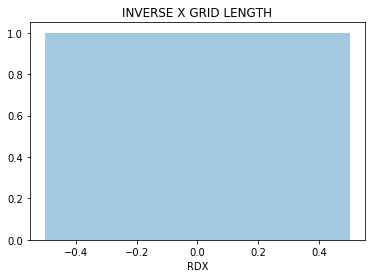

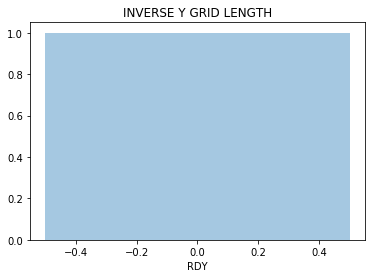

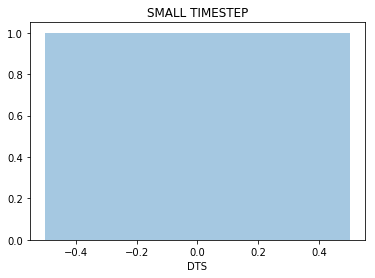

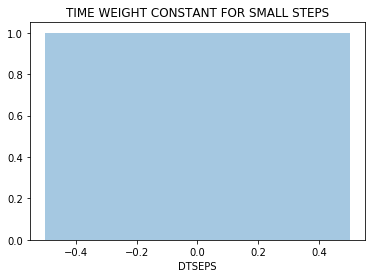

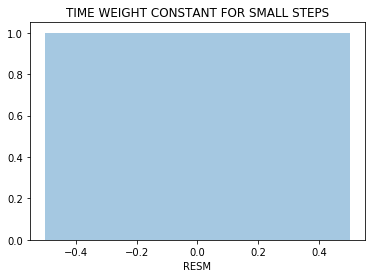

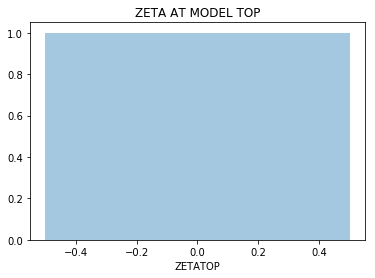

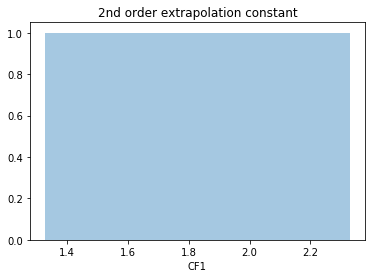

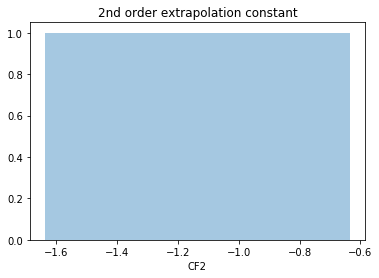

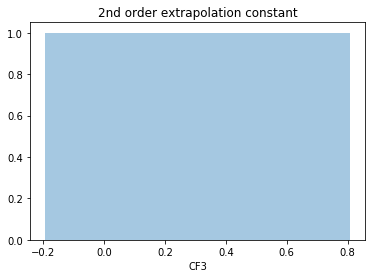

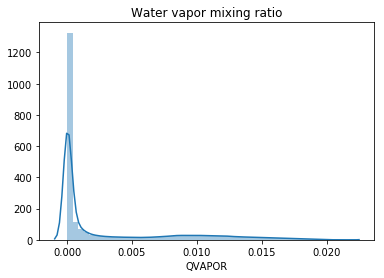

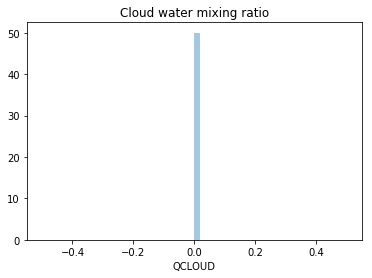

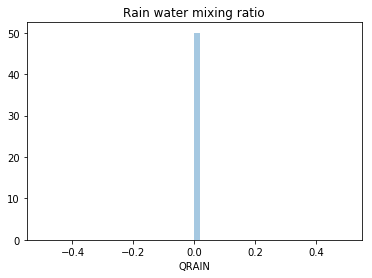

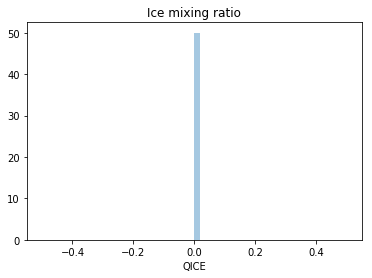

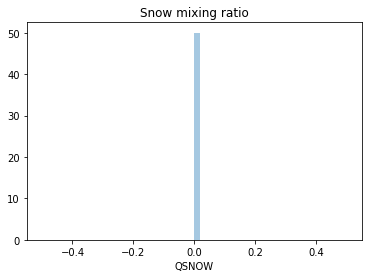

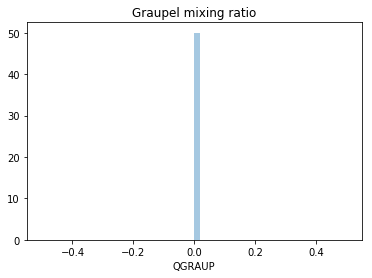

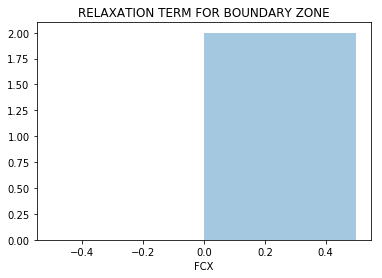

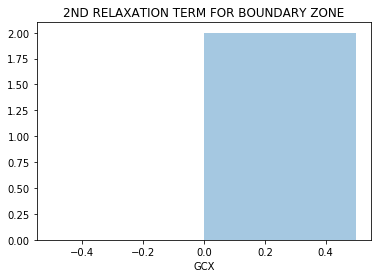

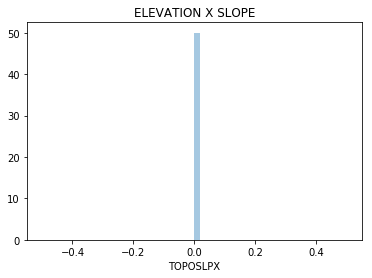

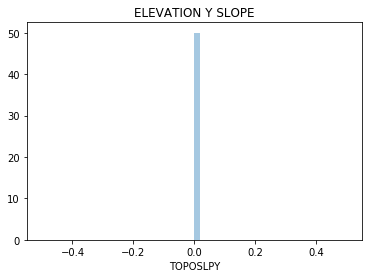

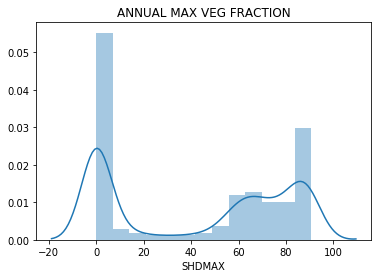

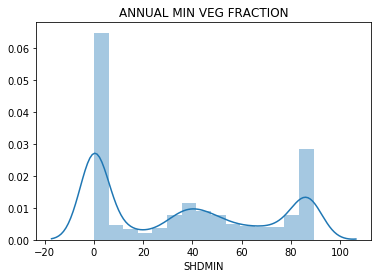

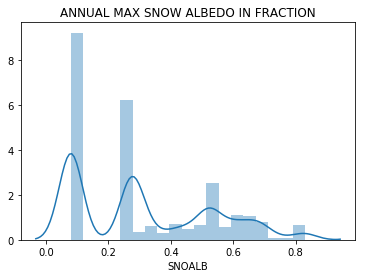

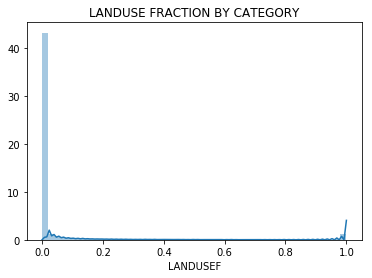

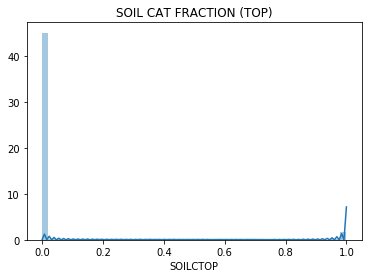

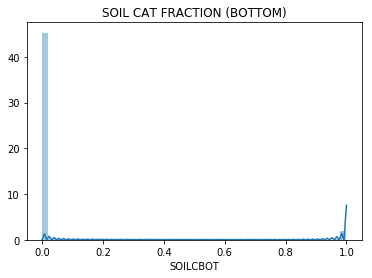

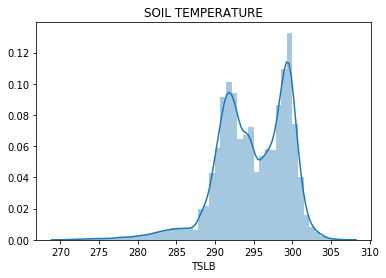

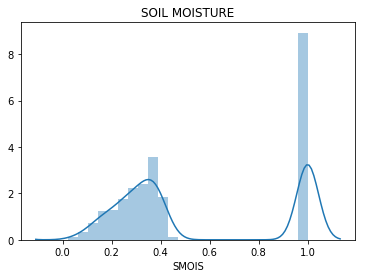

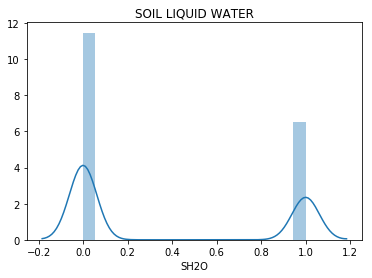

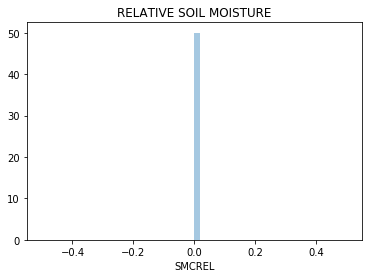

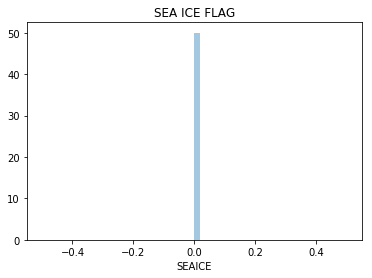

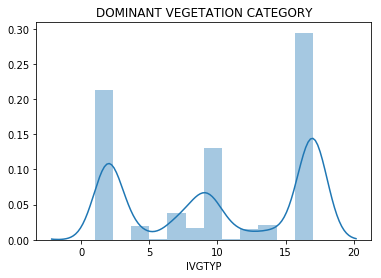

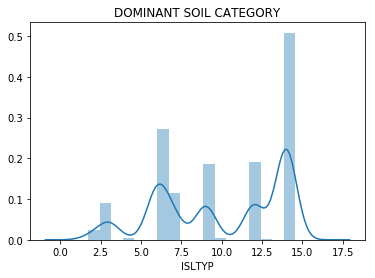

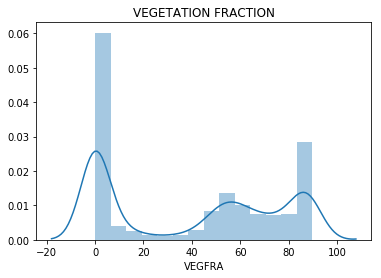

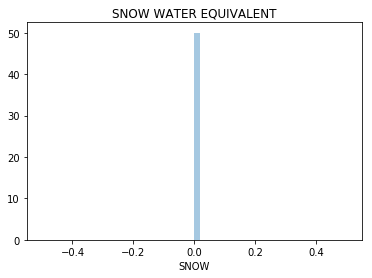

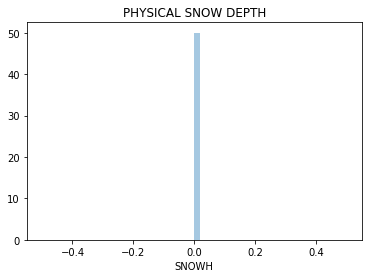

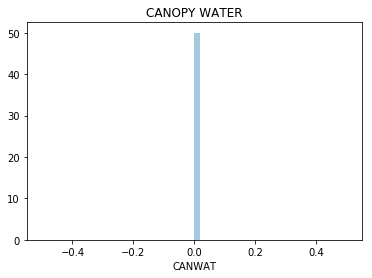

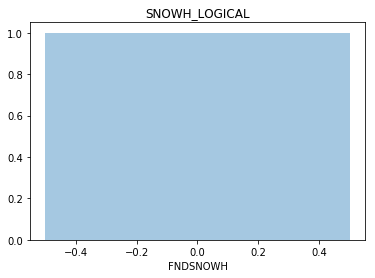

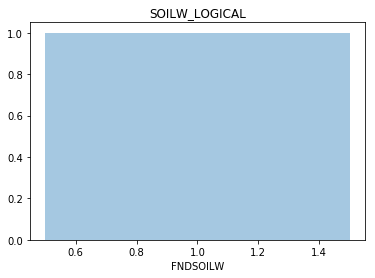

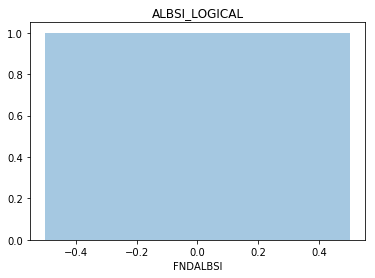

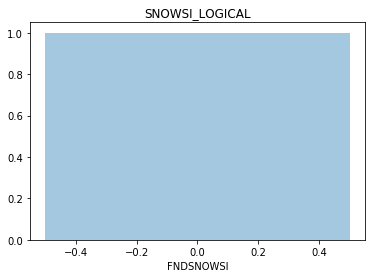

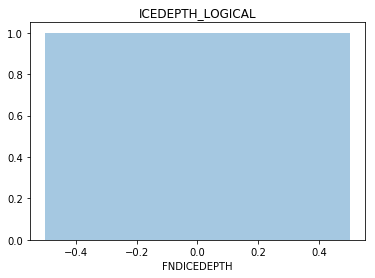

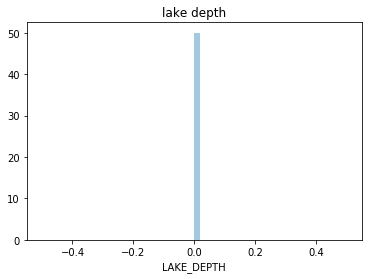

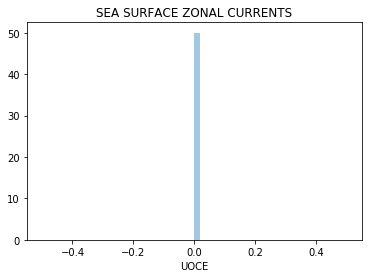

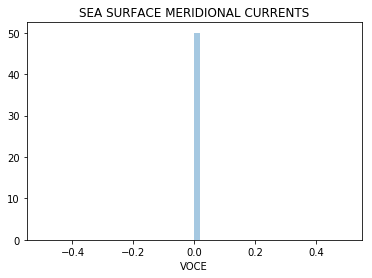

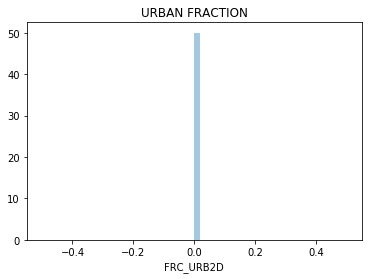

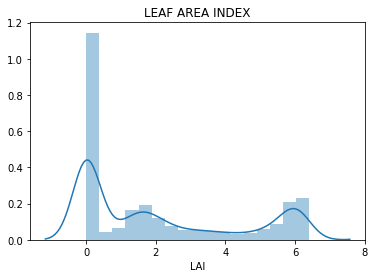

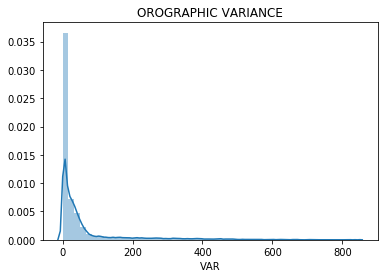

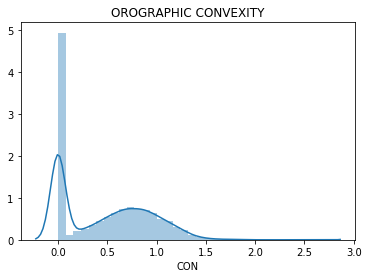

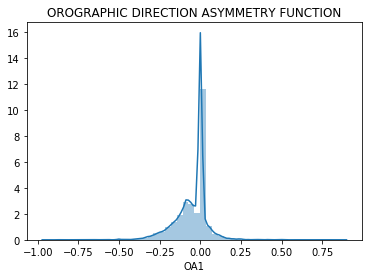

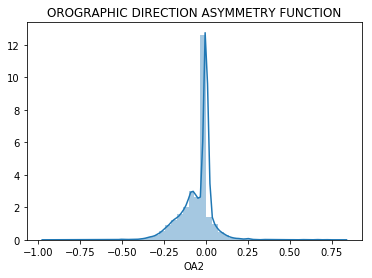

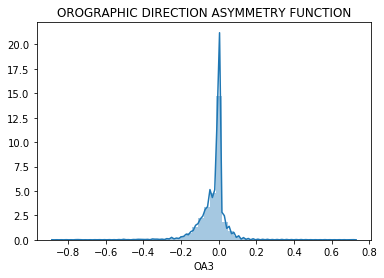

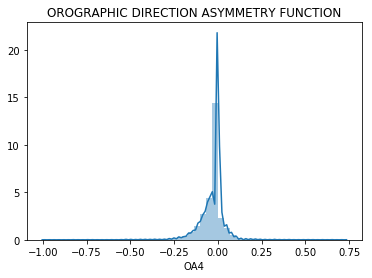

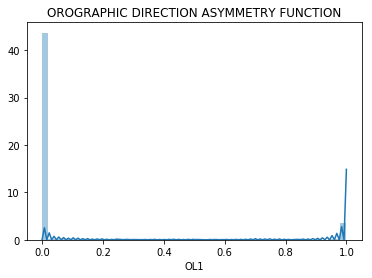

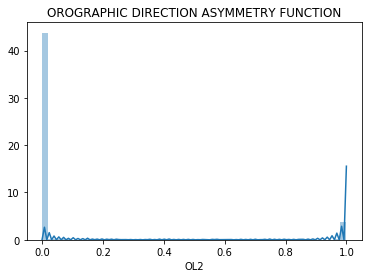

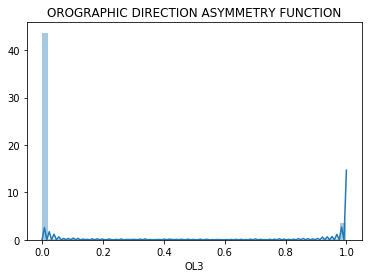

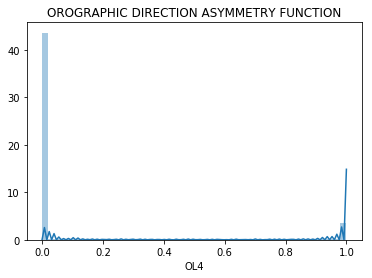

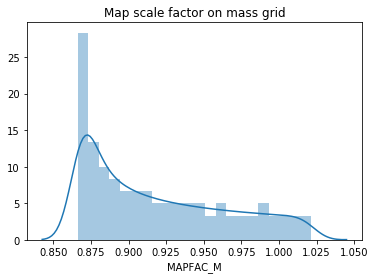

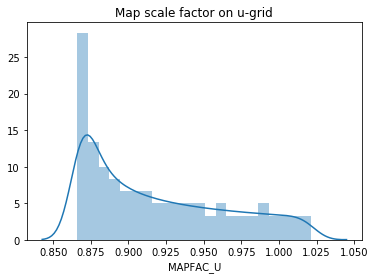

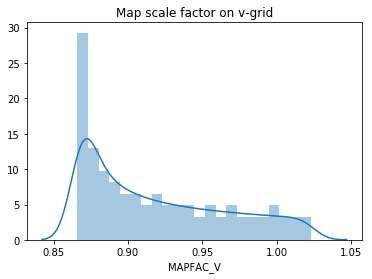

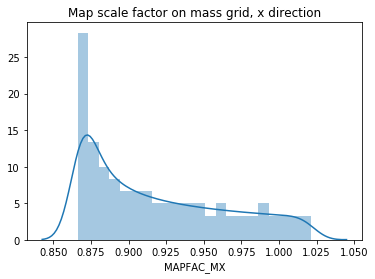

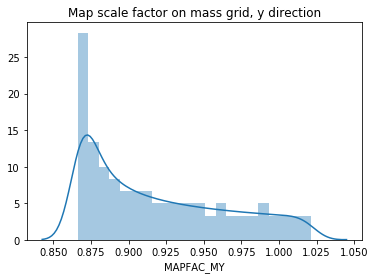

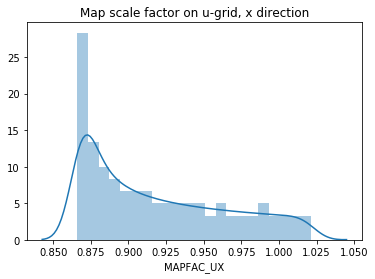

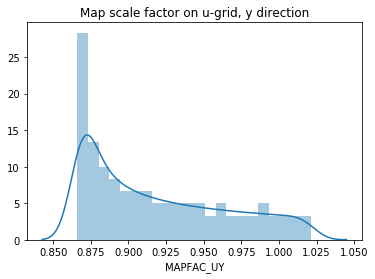

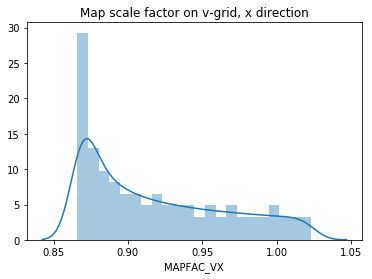

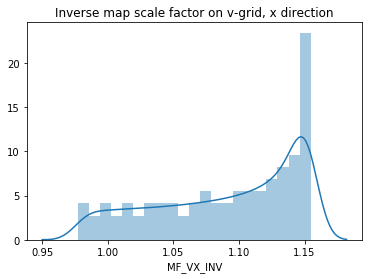

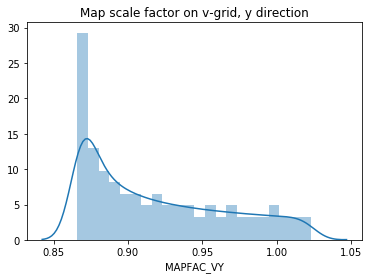

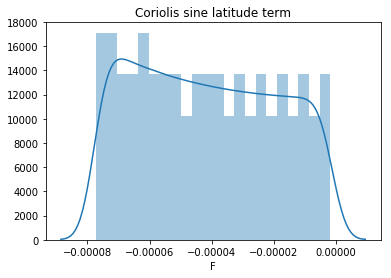

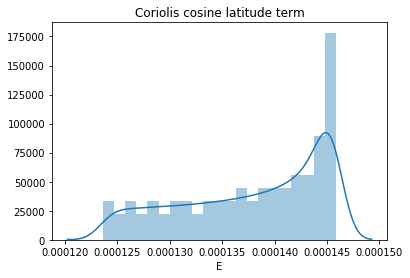

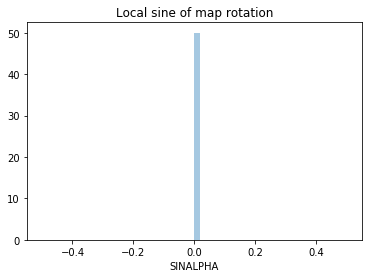

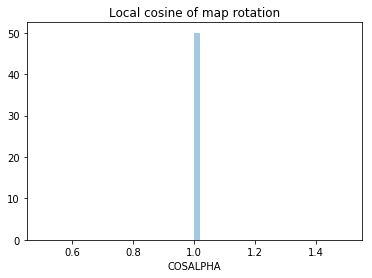

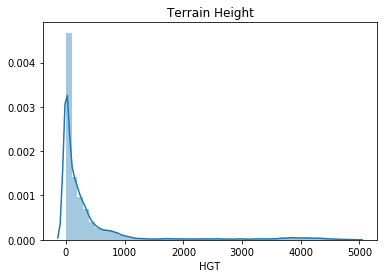

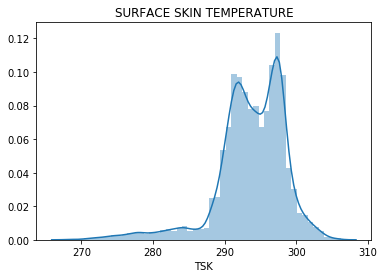

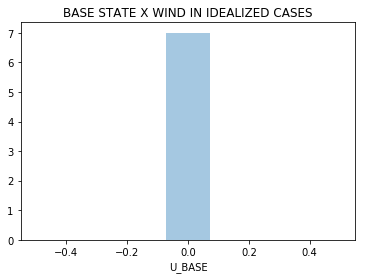

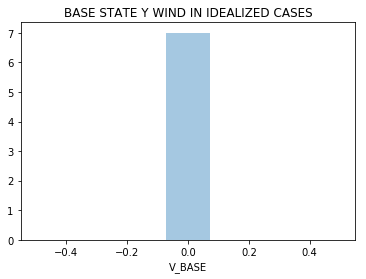

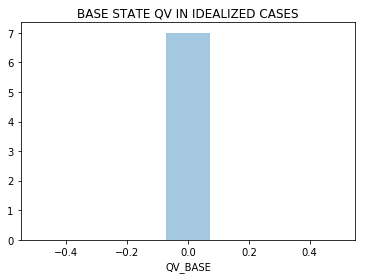

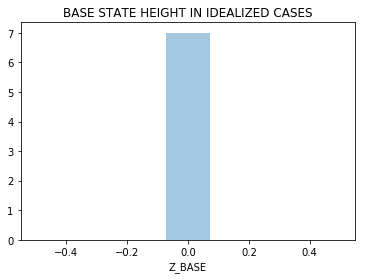

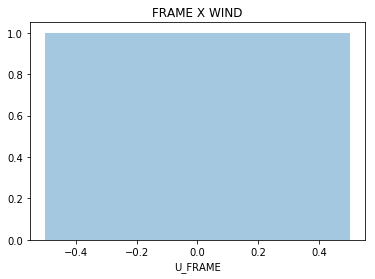

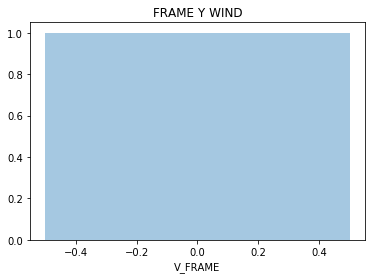

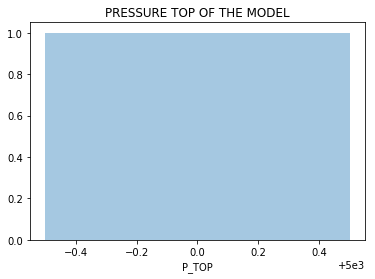

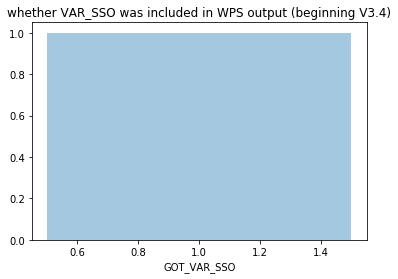

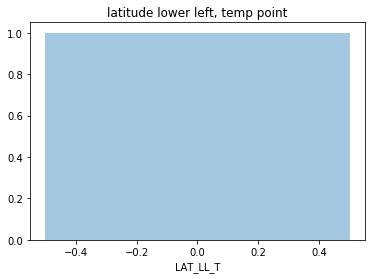

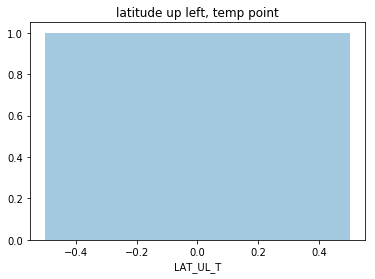

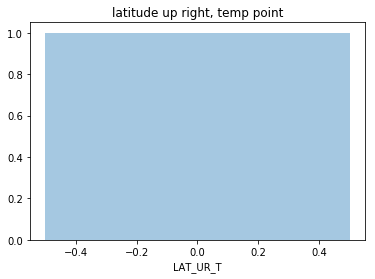

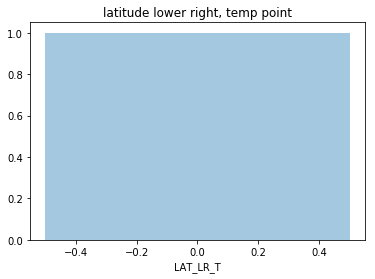

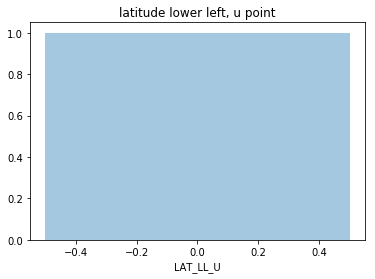

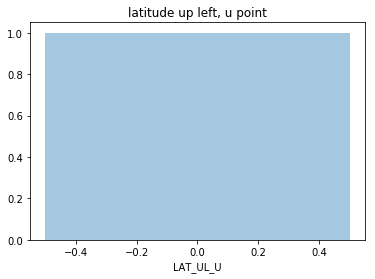

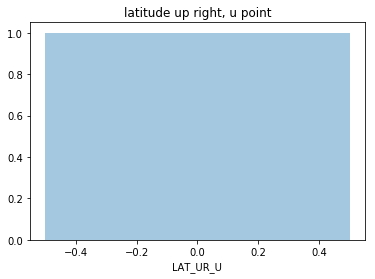

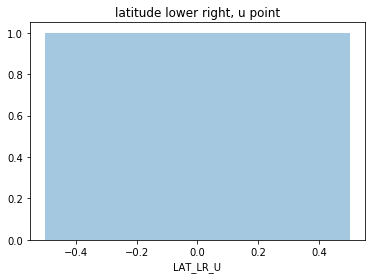

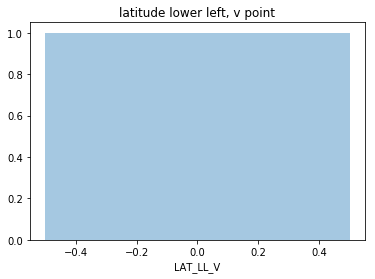

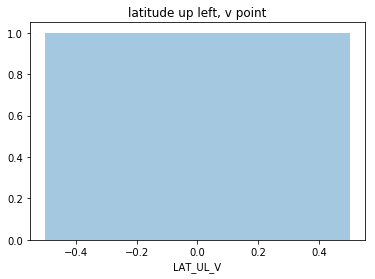

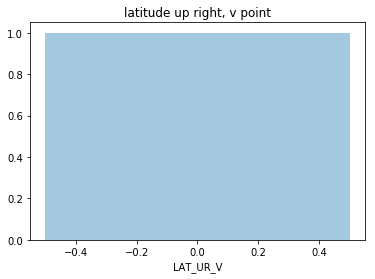

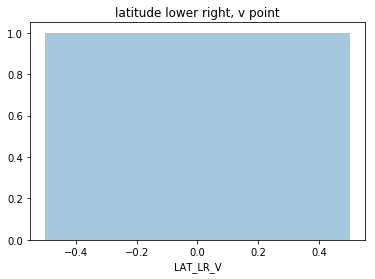

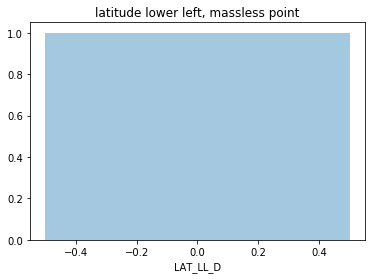

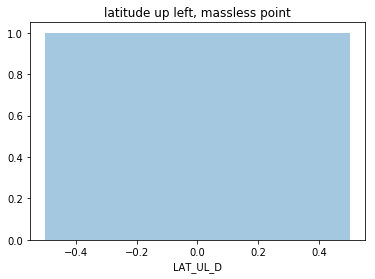

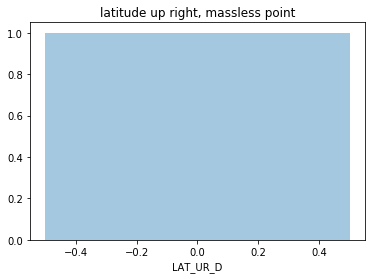

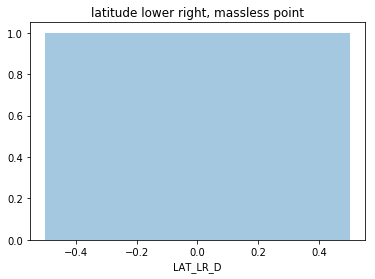

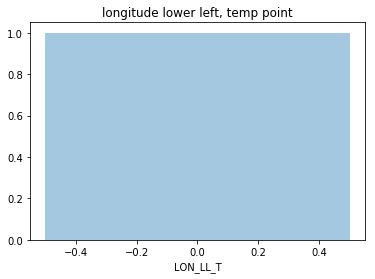

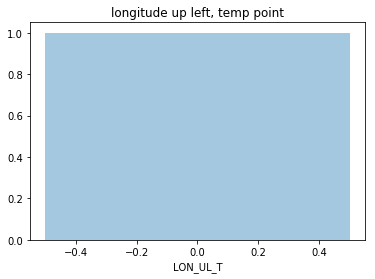

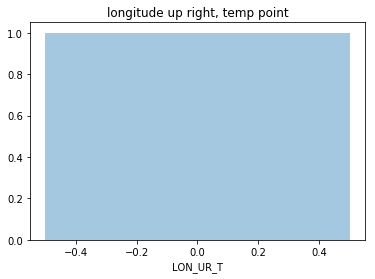

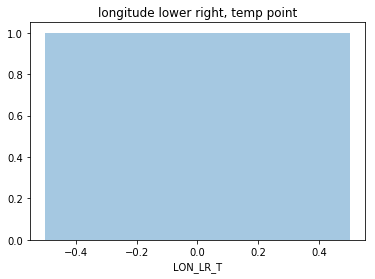

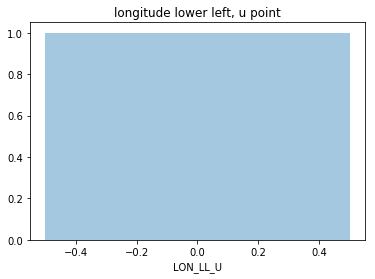

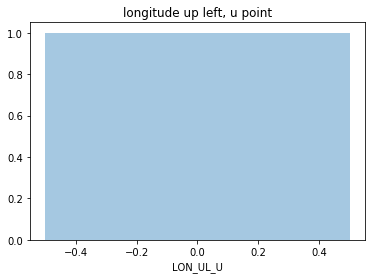

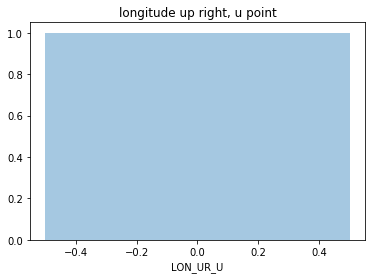

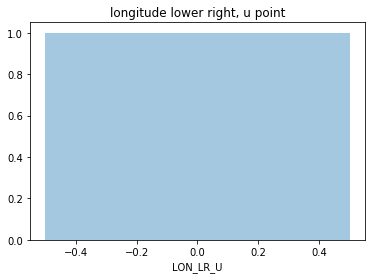

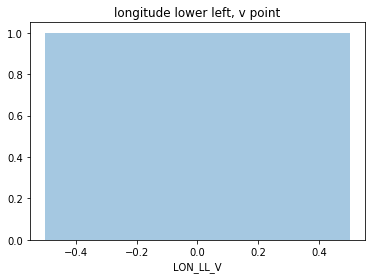

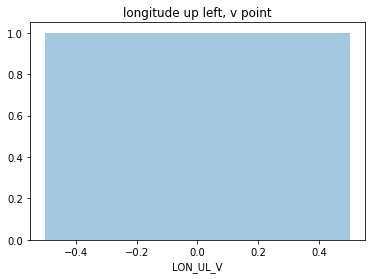

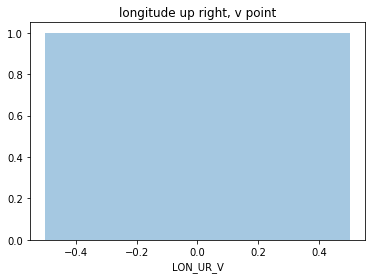

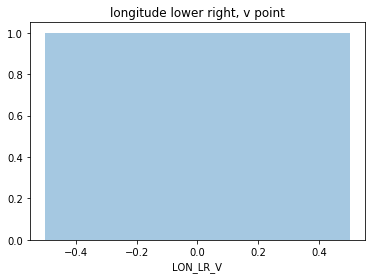

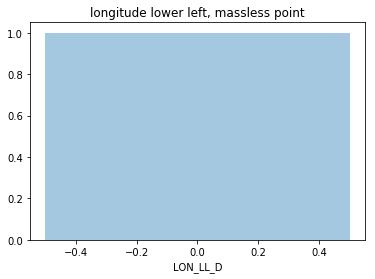

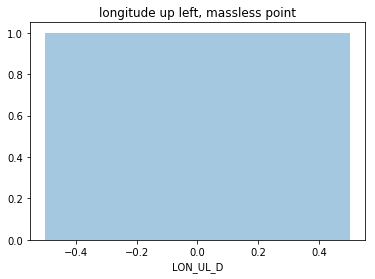

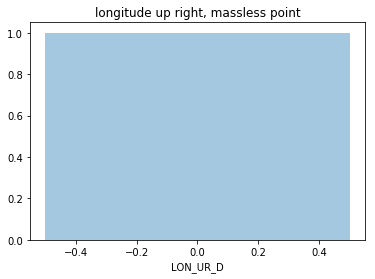

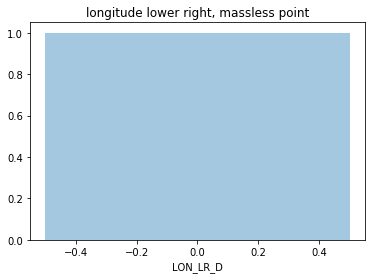

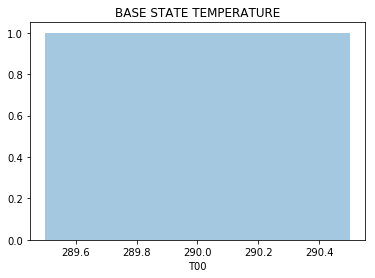

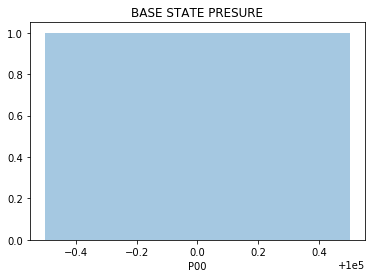

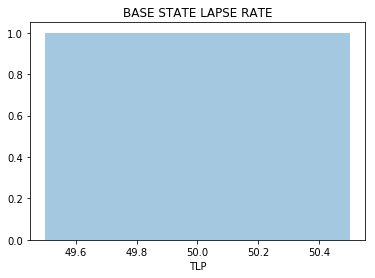

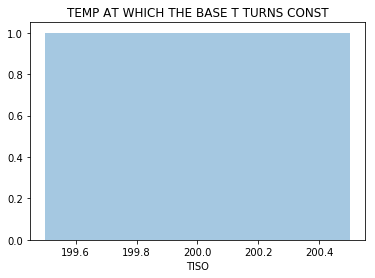

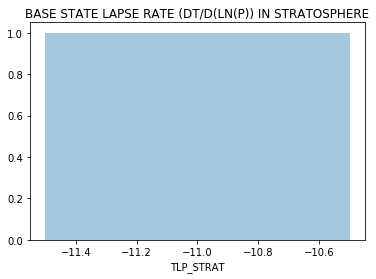

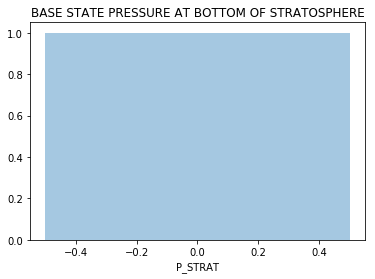

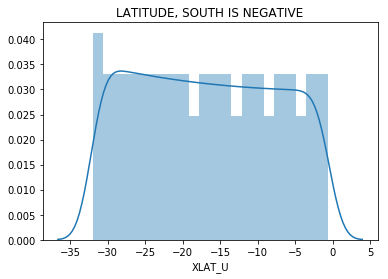

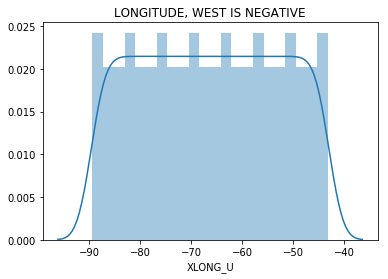

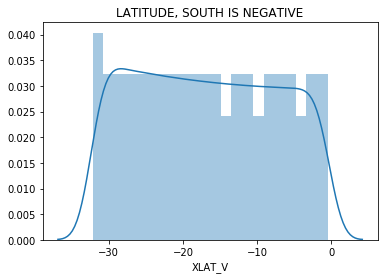

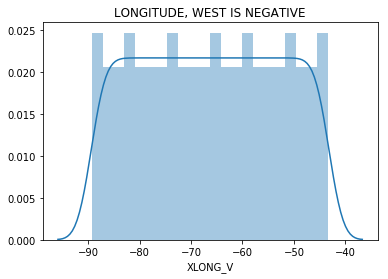

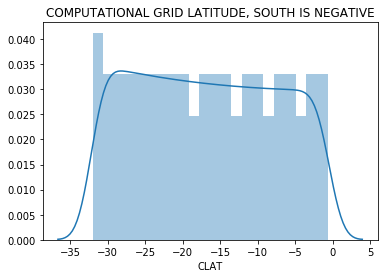

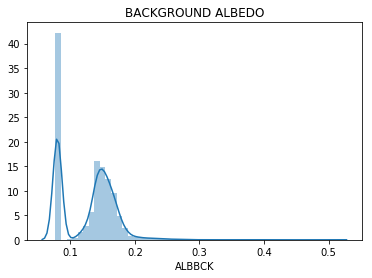

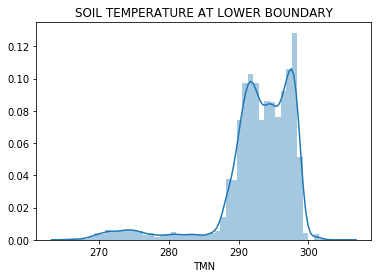

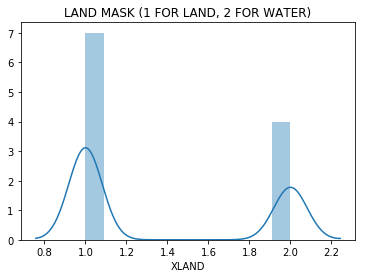

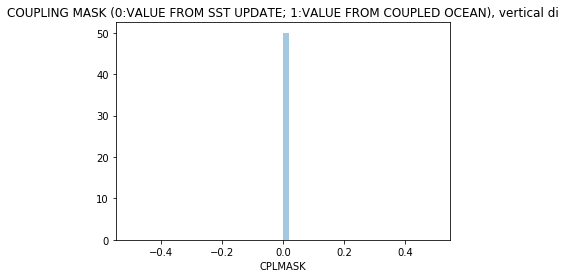

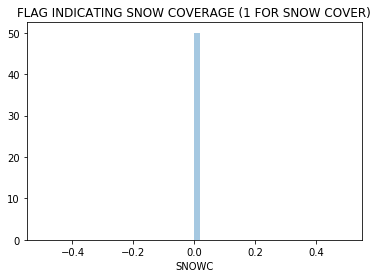

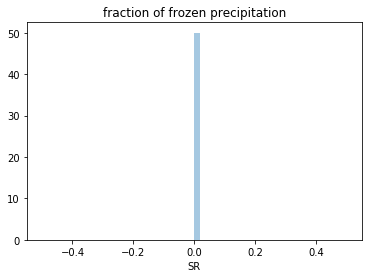

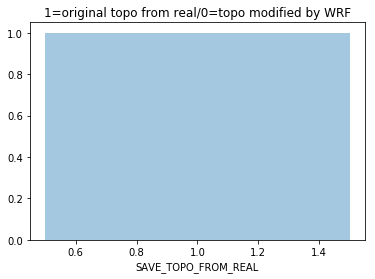

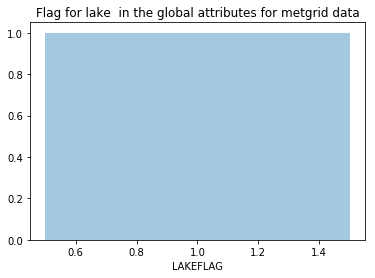

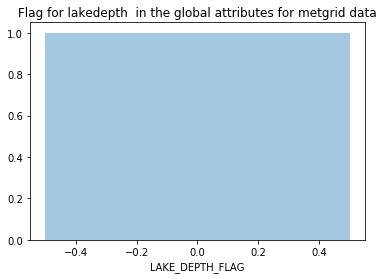

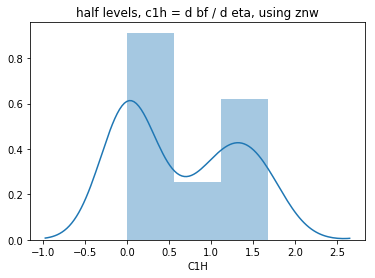

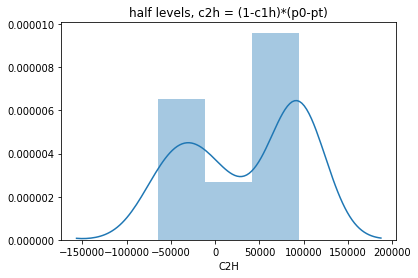

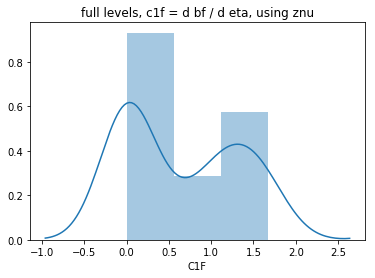

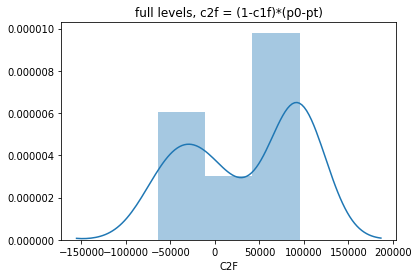

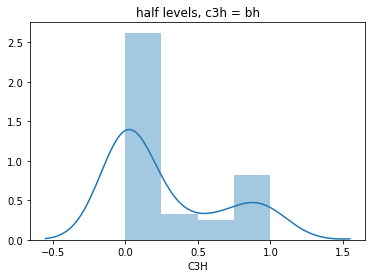

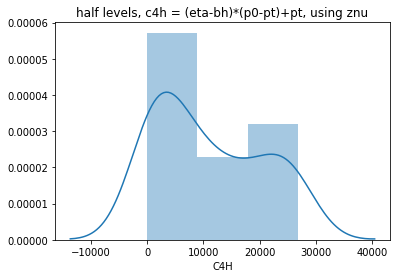

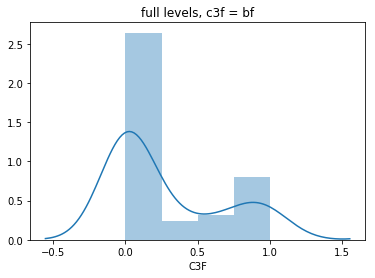

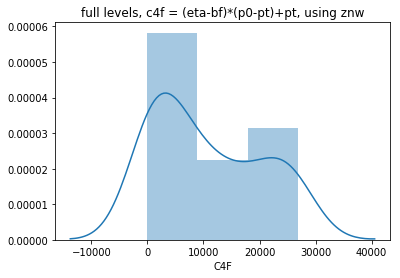

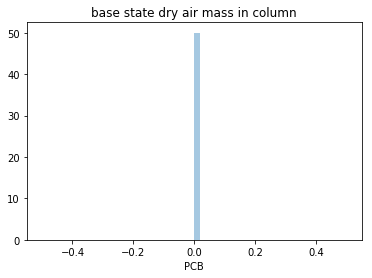

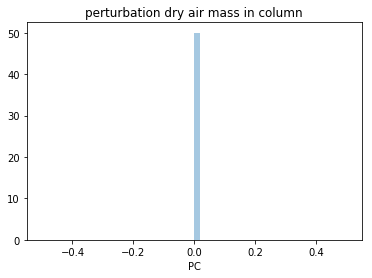

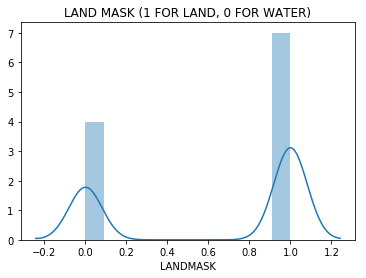

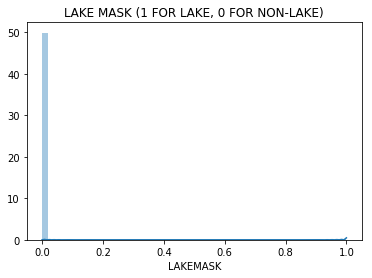

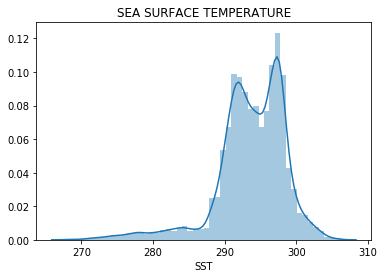

In [34]:
for v in list(xa.variables):
    try: 
        desc = xa[v].description
    except: desc = ''
    fig, ax = plt.subplots()
    ax.set_title(desc)
    ax.set_xlabel(v)
    try:
        sns.distplot(xa[v].values.flatten())
    except: 
        pass
        
        

In [35]:
xa = xr.open_dataset(file_path).isel(Time=0)
list(xa.dims)




['DIM0010',
 'bottom_top',
 'bottom_top_stag',
 'dust_erosion_dimension',
 'land_cat_stag',
 'num_ext_model_couple_dom_stag',
 'soil_cat_stag',
 'soil_layers_stag',
 'south_north',
 'south_north_stag',
 'west_east',
 'west_east_stag']

In [38]:
variables = list(xa.variables)

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


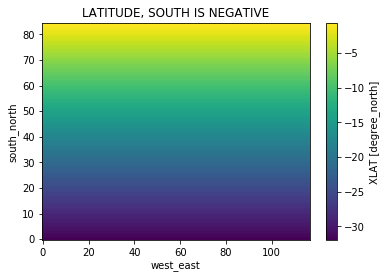

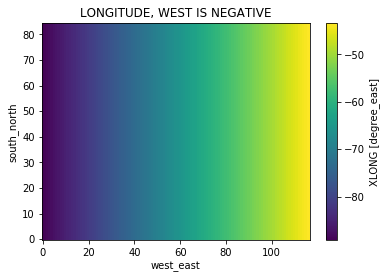

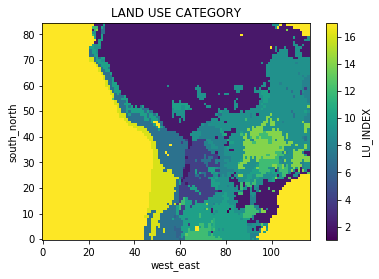

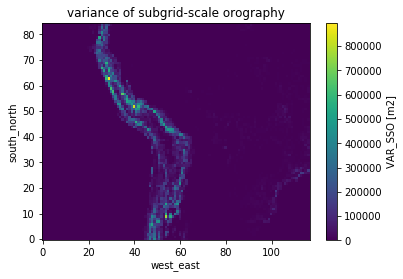

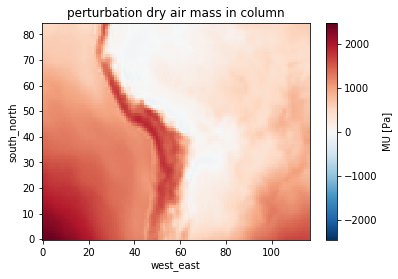

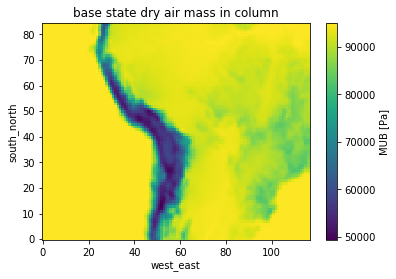

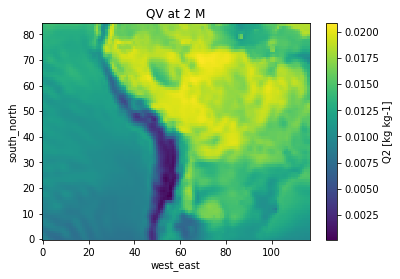

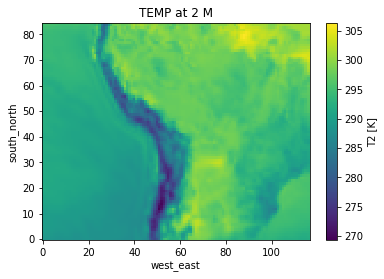

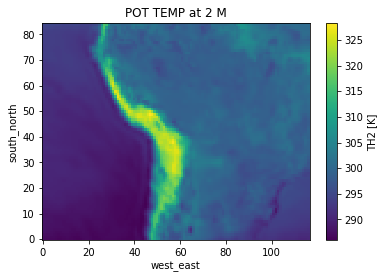

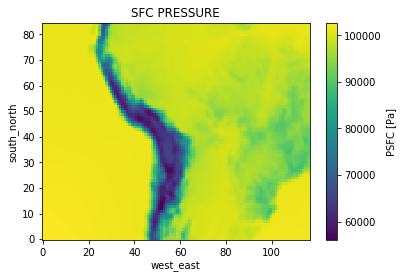

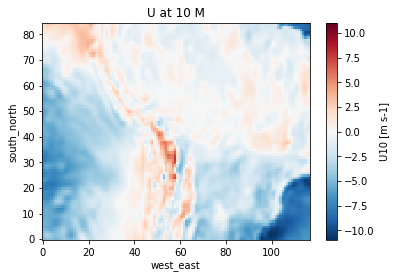

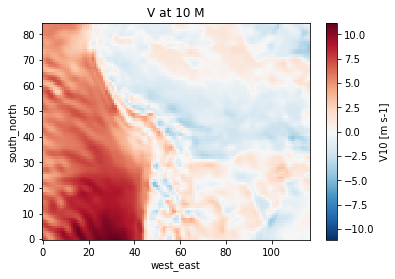

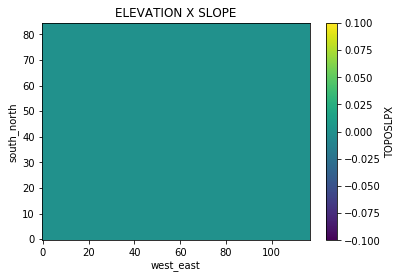

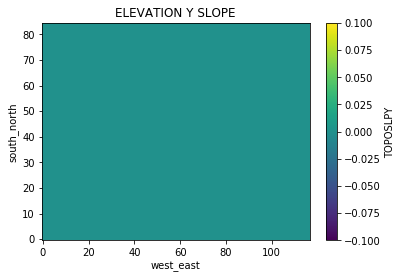

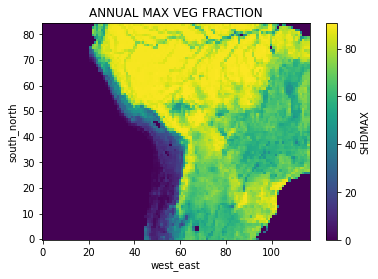

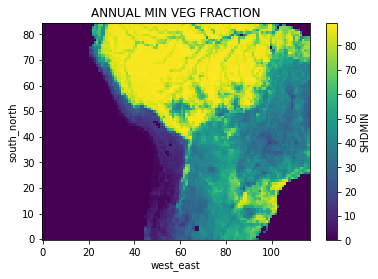

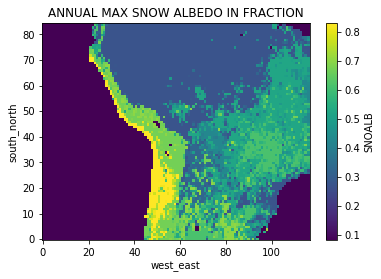

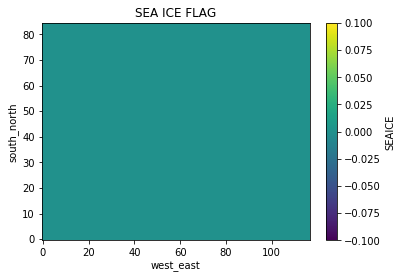

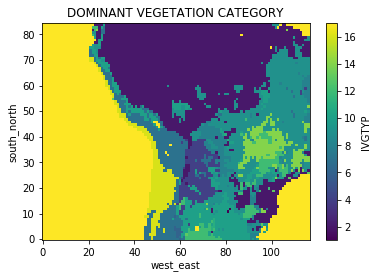

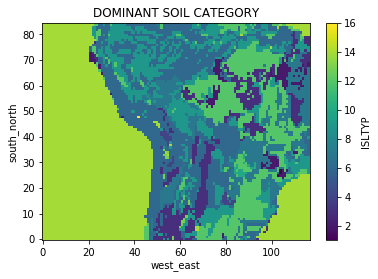

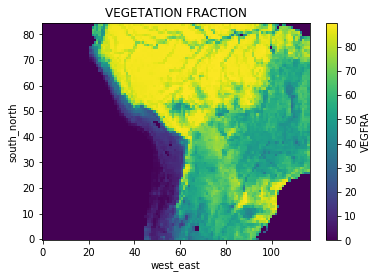

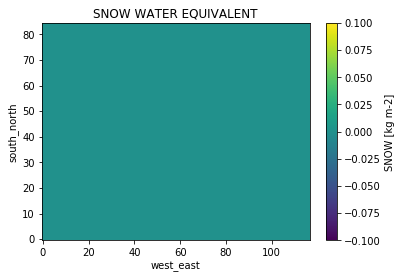

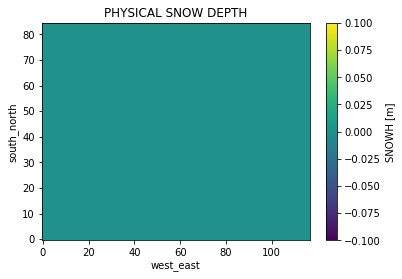

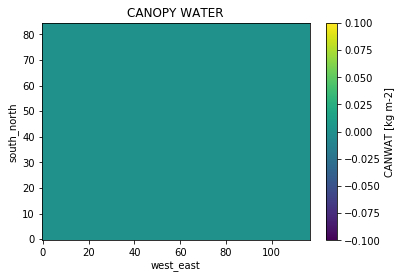

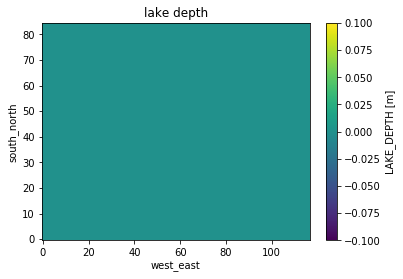

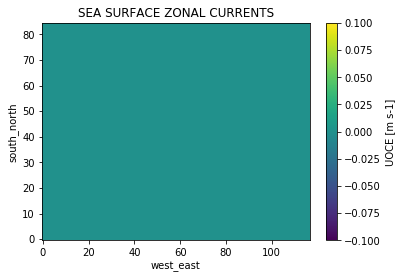

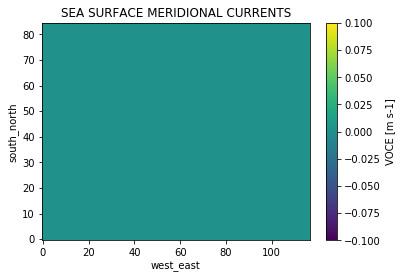

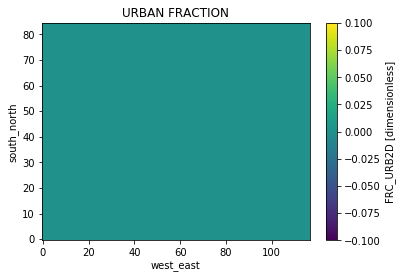

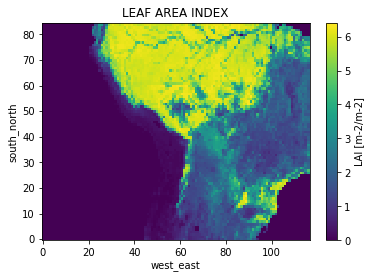

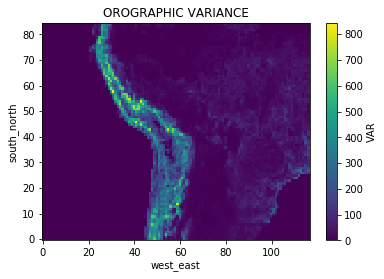

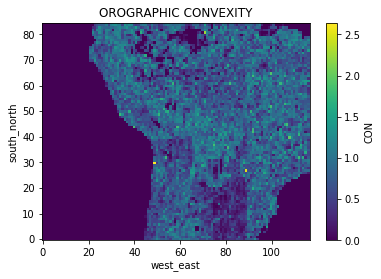

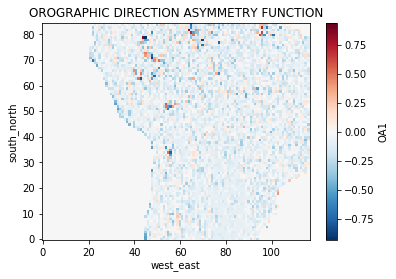

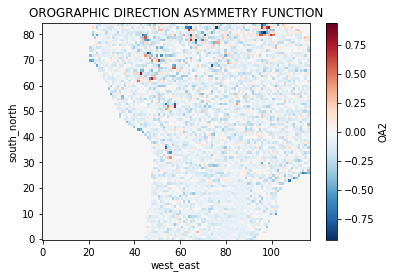

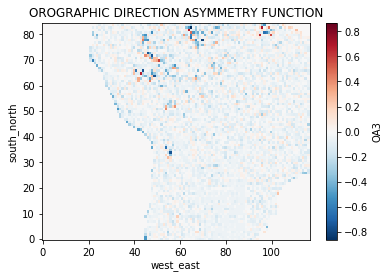

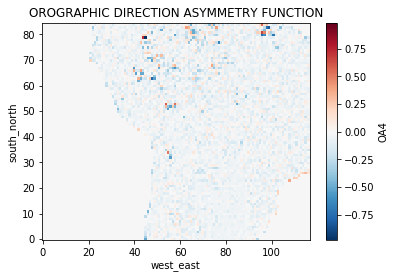

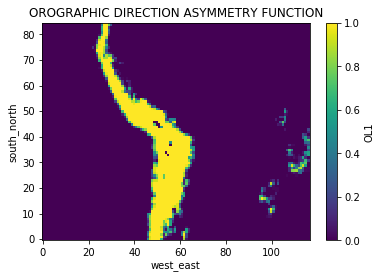

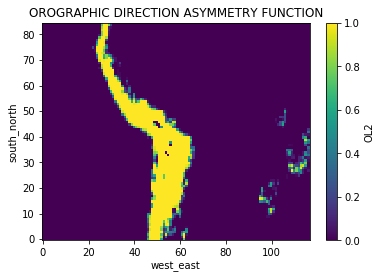

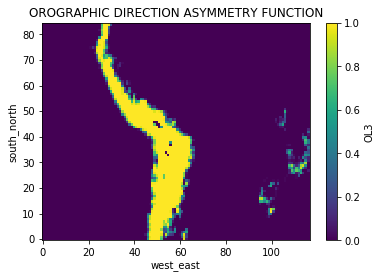

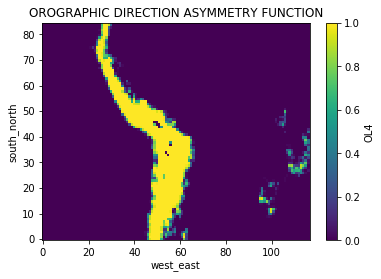

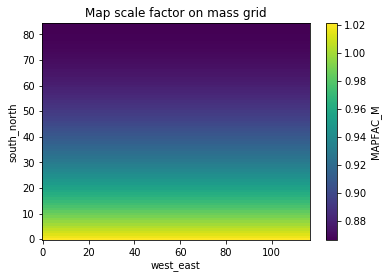

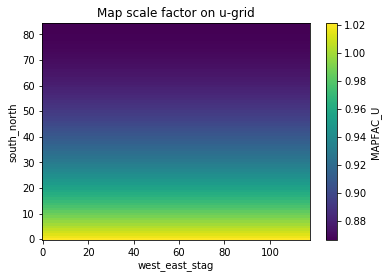

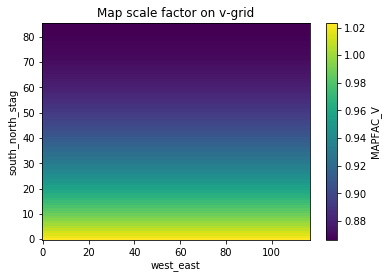

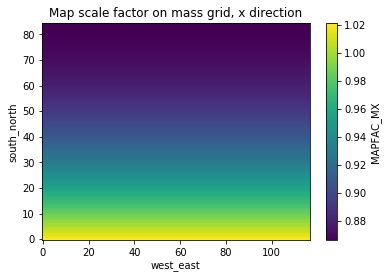

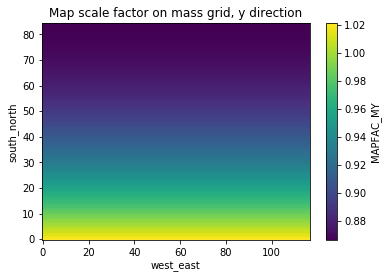

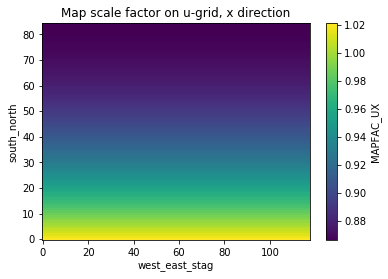

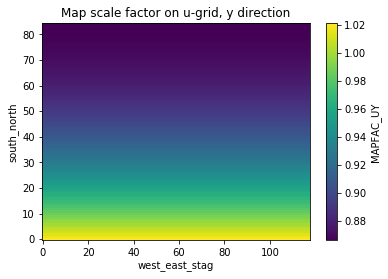

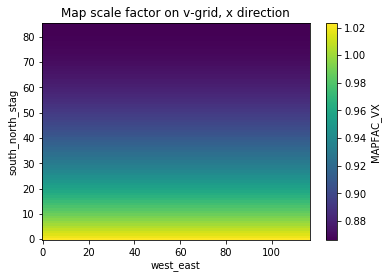

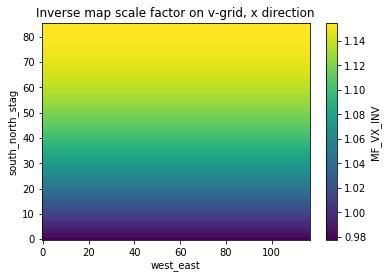

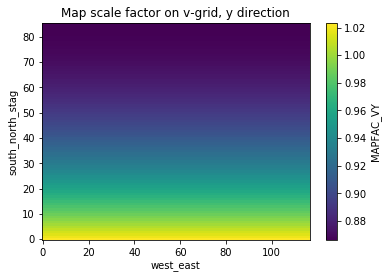

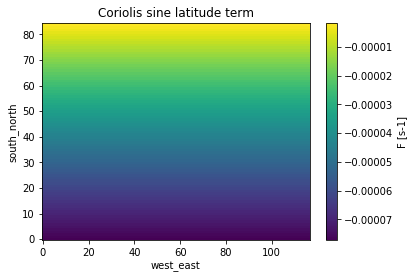

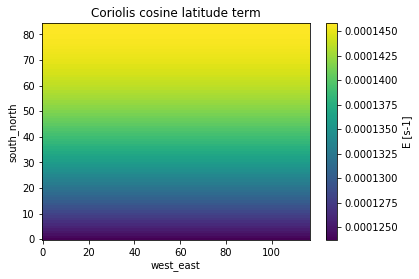

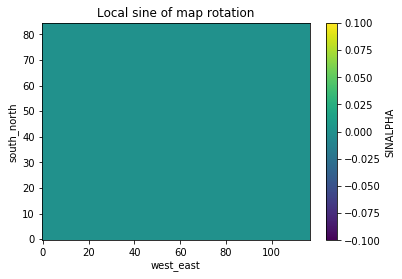

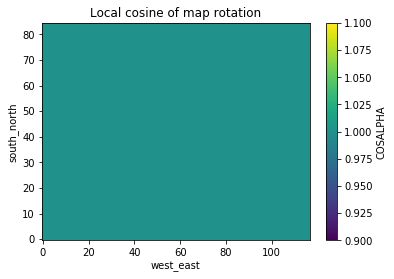

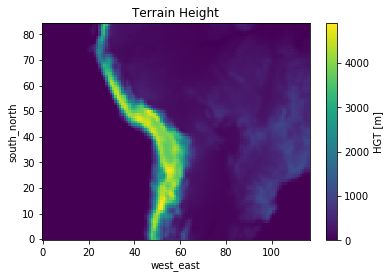

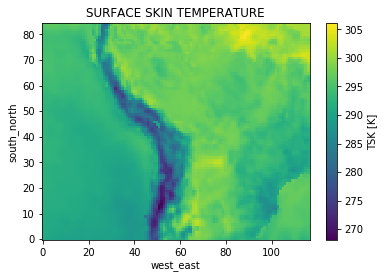

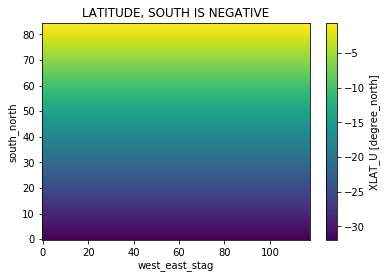

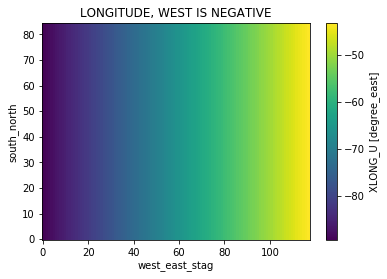

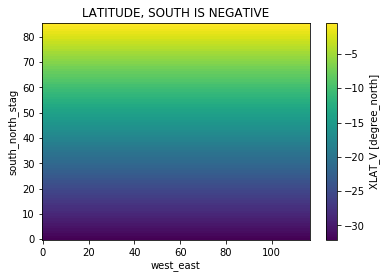

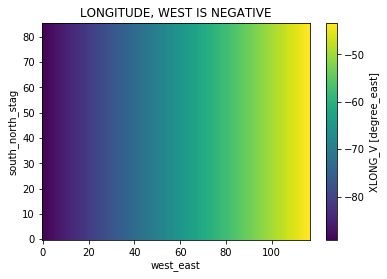

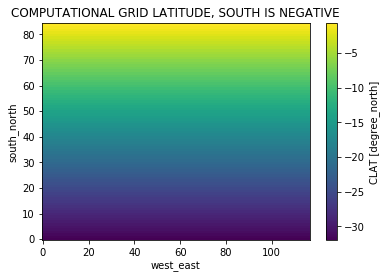

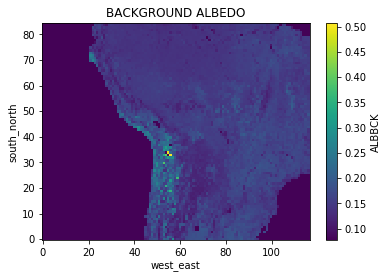

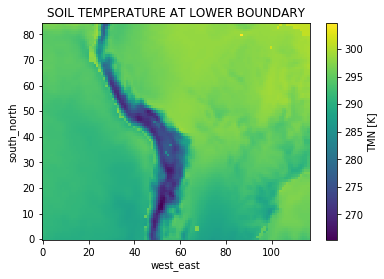

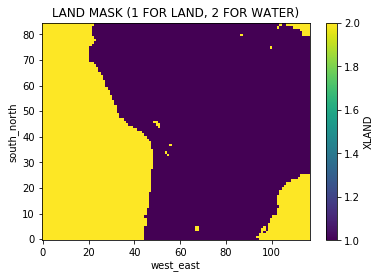

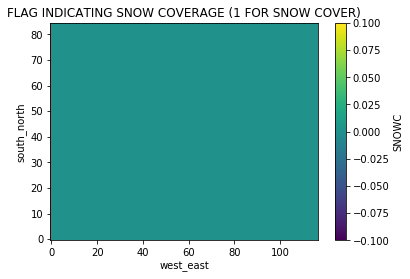

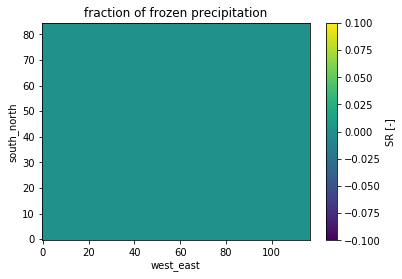

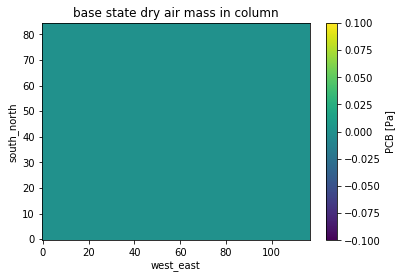

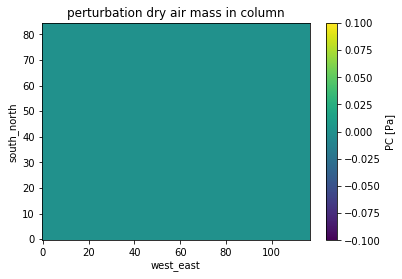

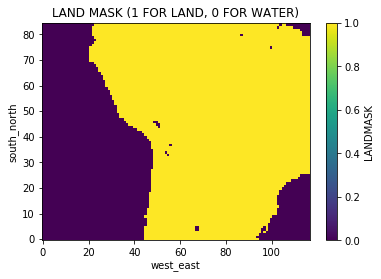

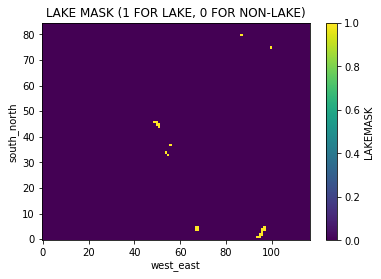

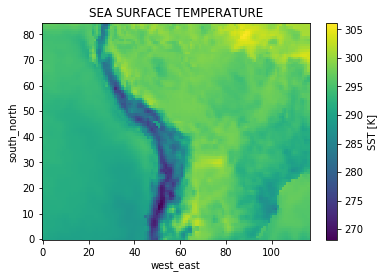

In [50]:
for v in variables:
    ll = len(xa[v].dims)
    if ll==2:
        try: desc=xa[v].description
        except: desc=''
        fig, ax = plt.subplots()
        xa[v].plot()
        ax.set_title(desc)

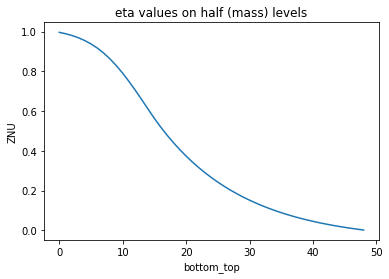

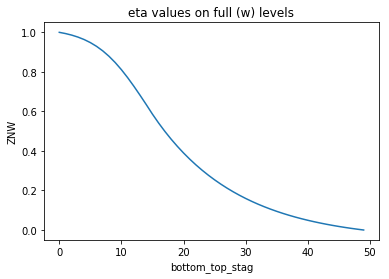

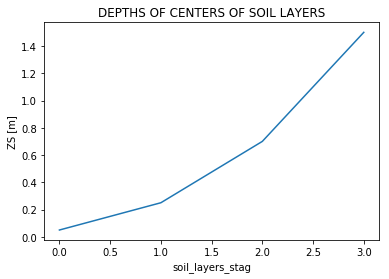

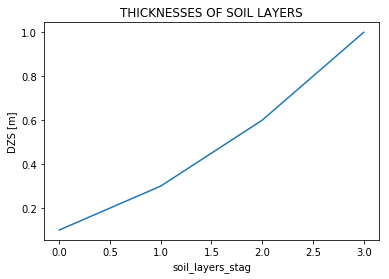

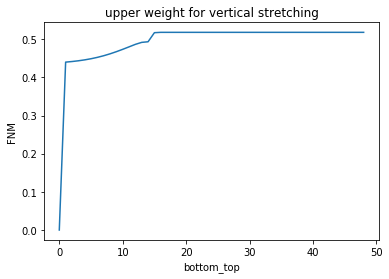

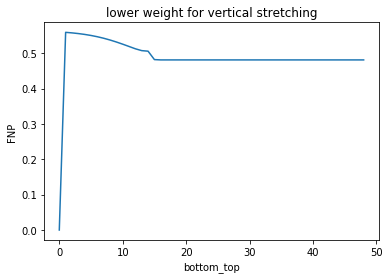

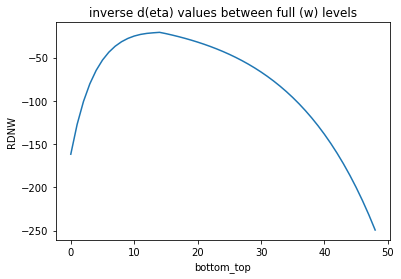

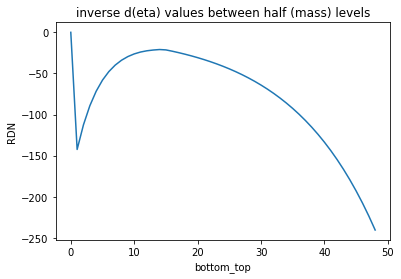

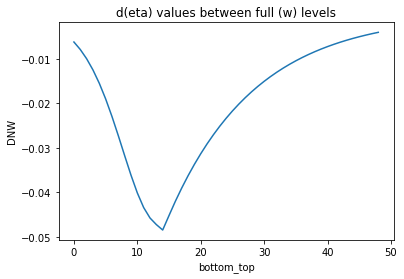

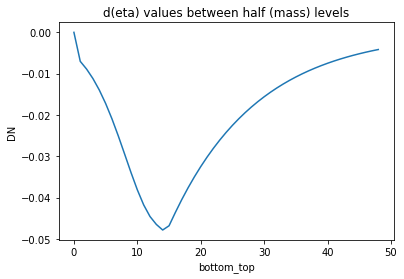

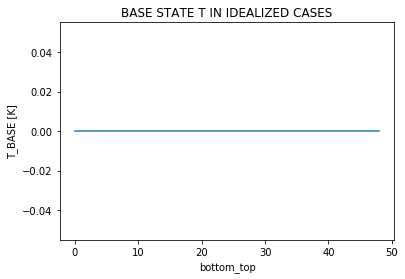

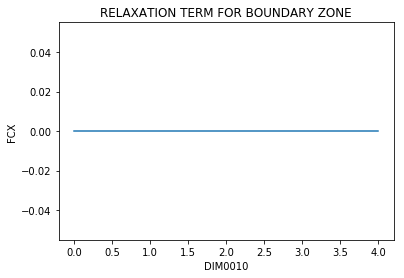

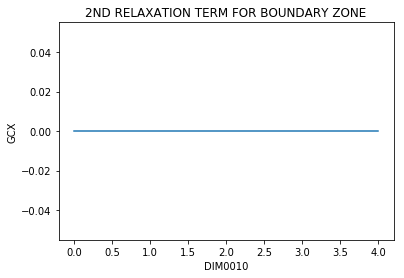

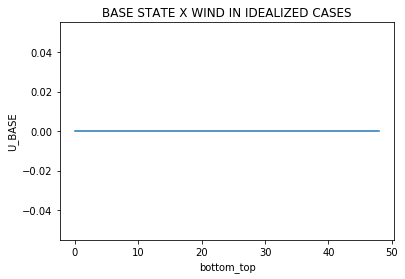

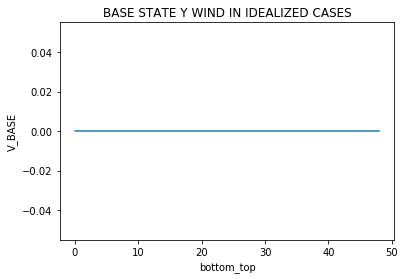

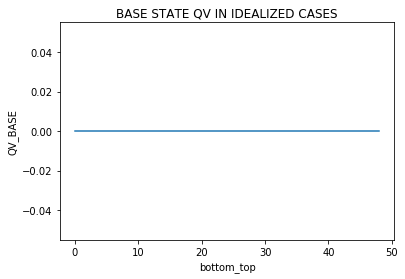

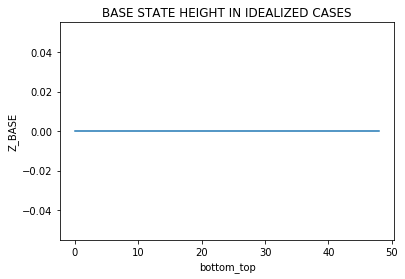

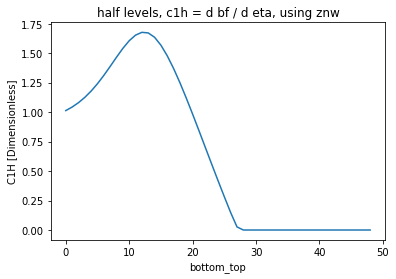

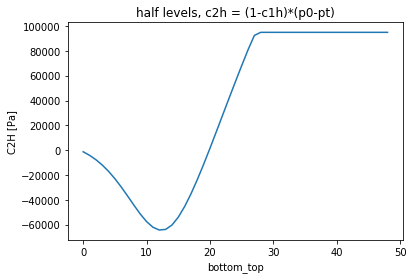

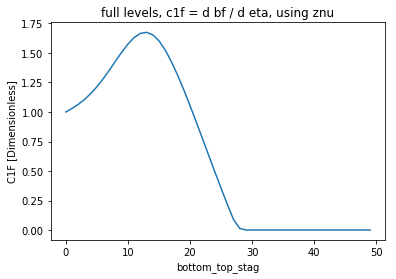

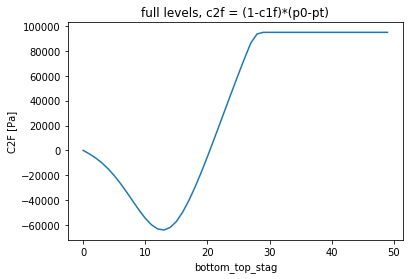

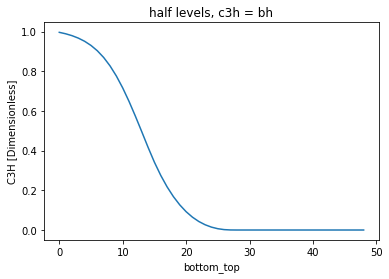

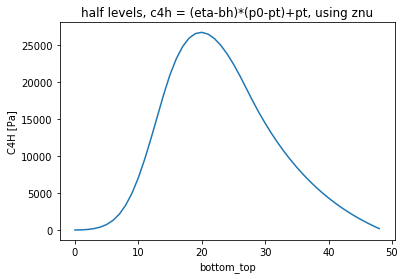

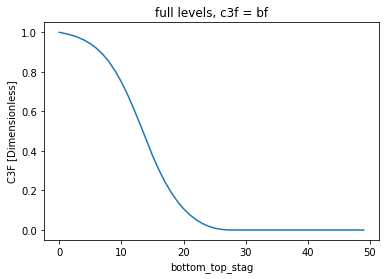

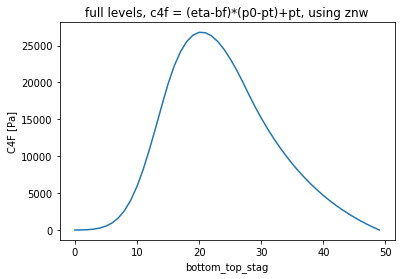

In [51]:
for v in variables:
    ll = len(xa[v].dims)
    if ll==1:
        try: desc=xa[v].description
        except: desc=''
        fig, ax = plt.subplots()
        xa[v].plot()
        ax.set_title(desc)

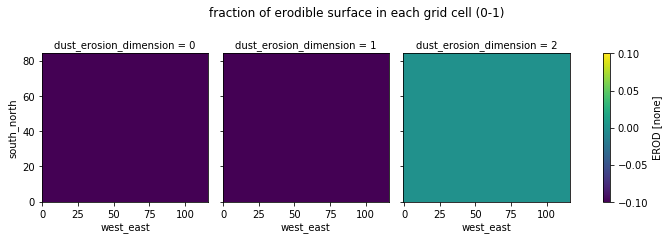

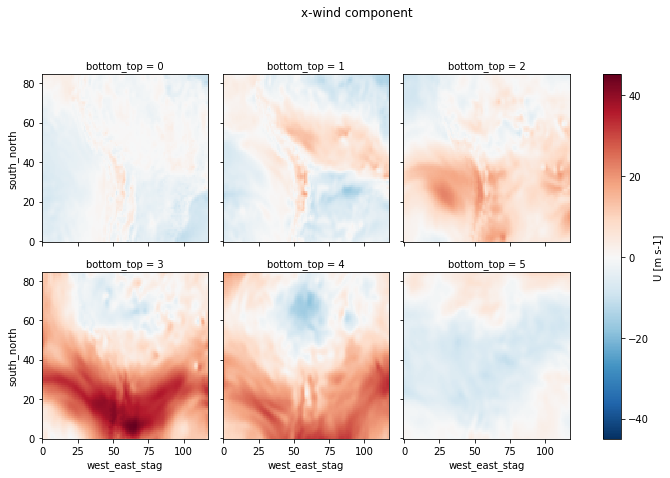

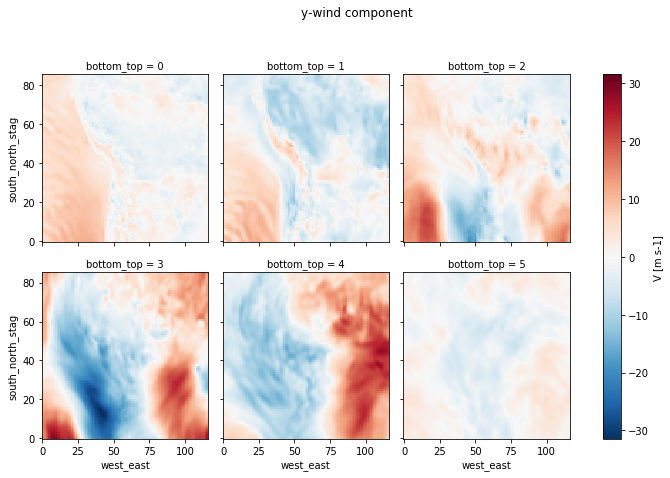

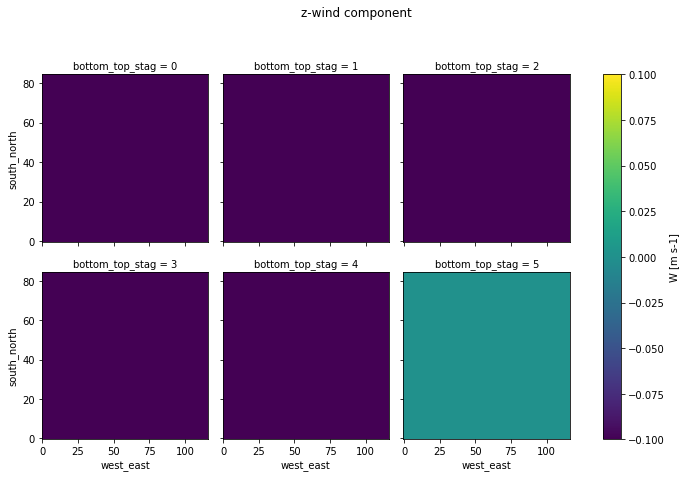

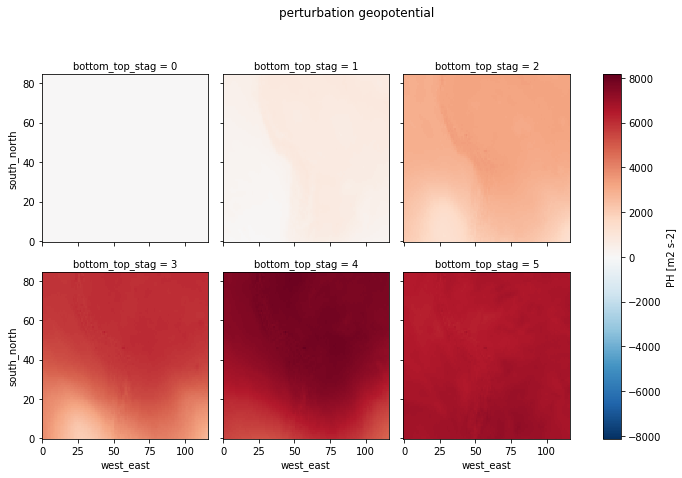

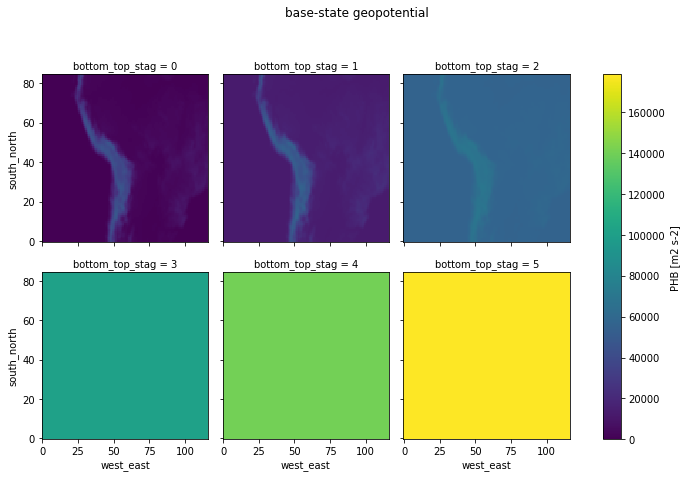

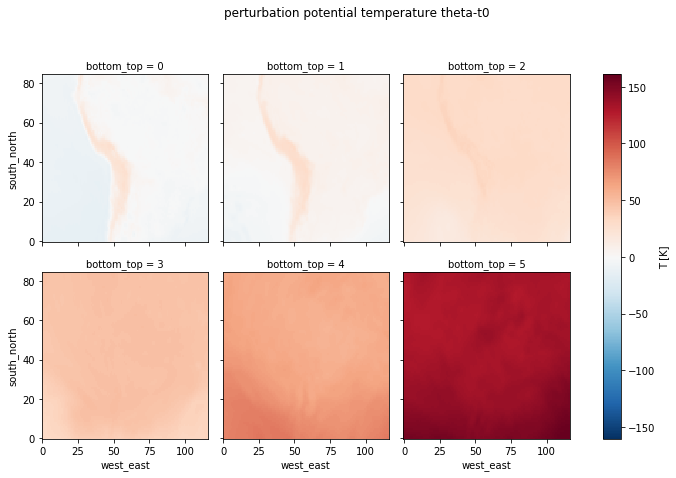

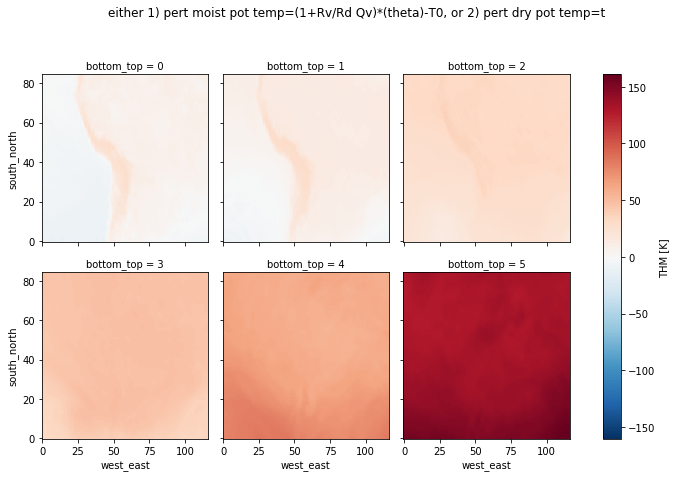

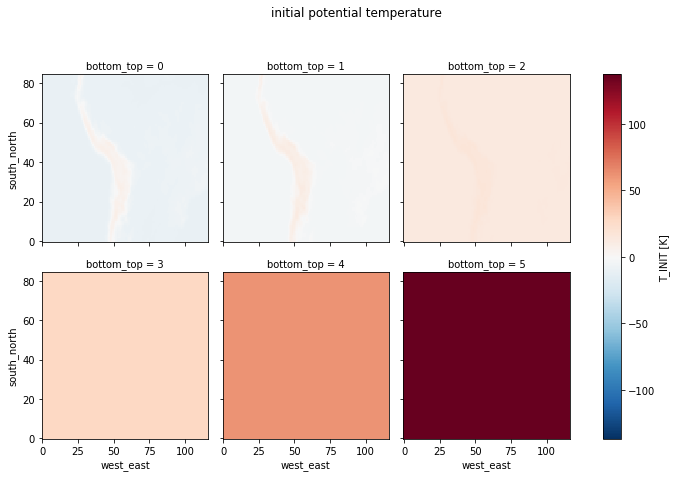

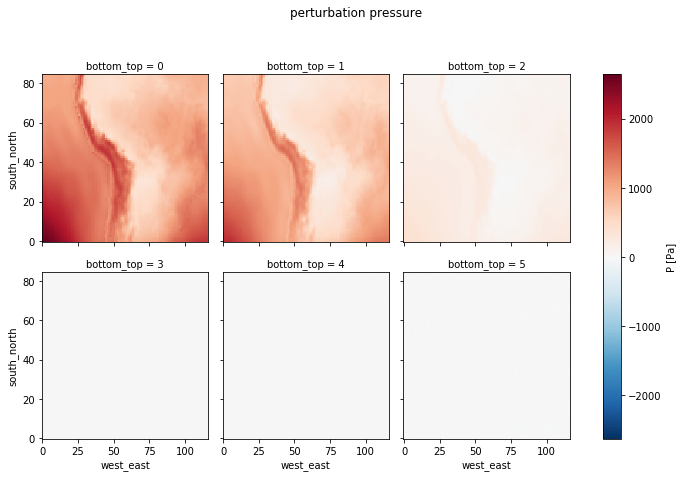

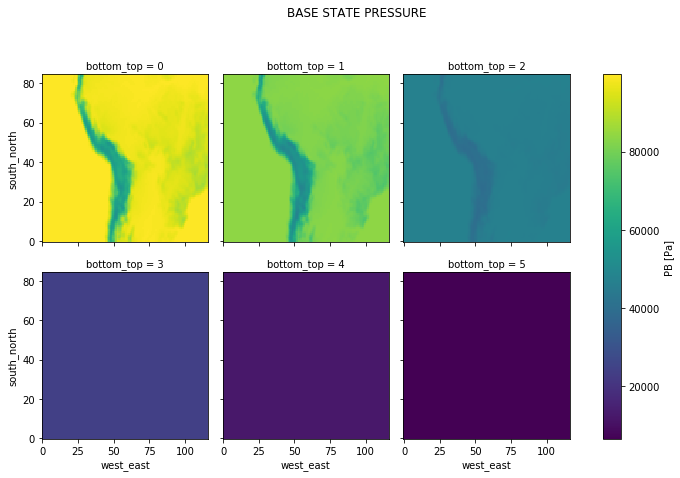

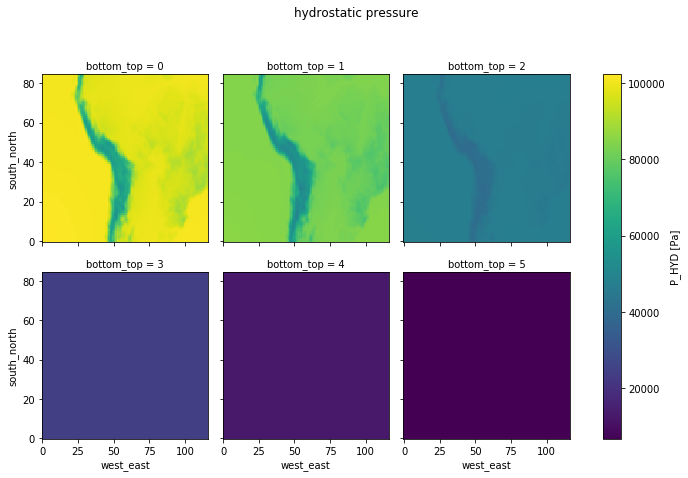

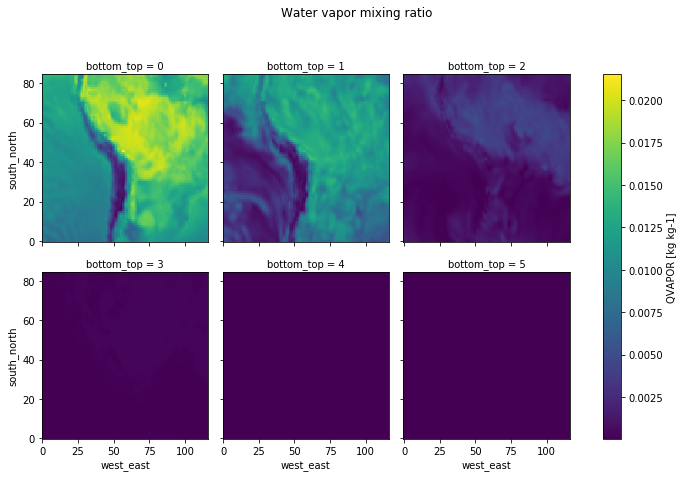

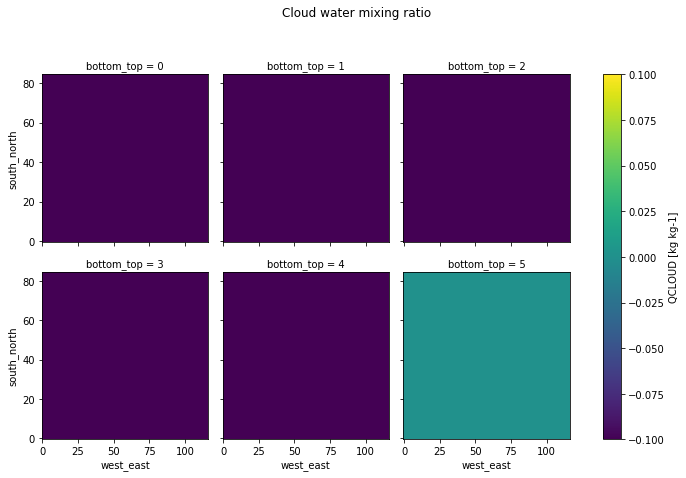

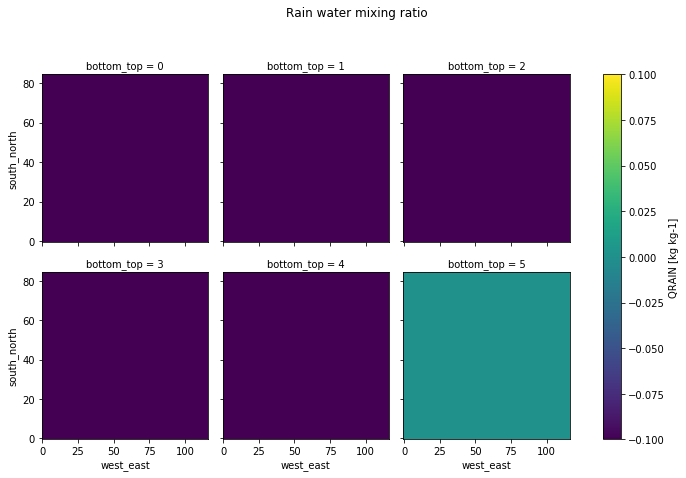

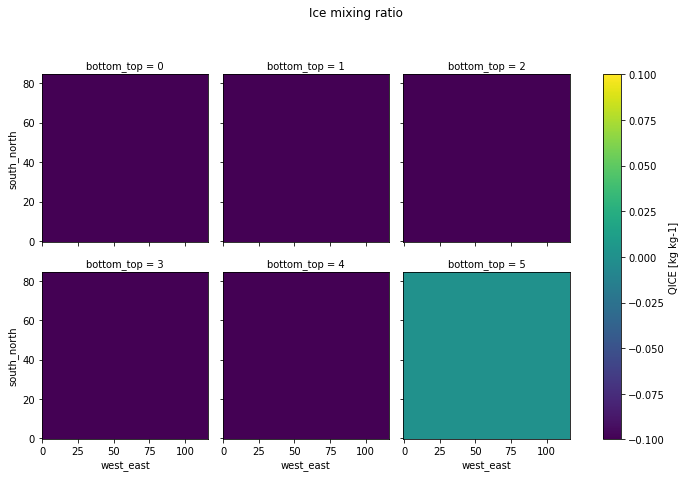

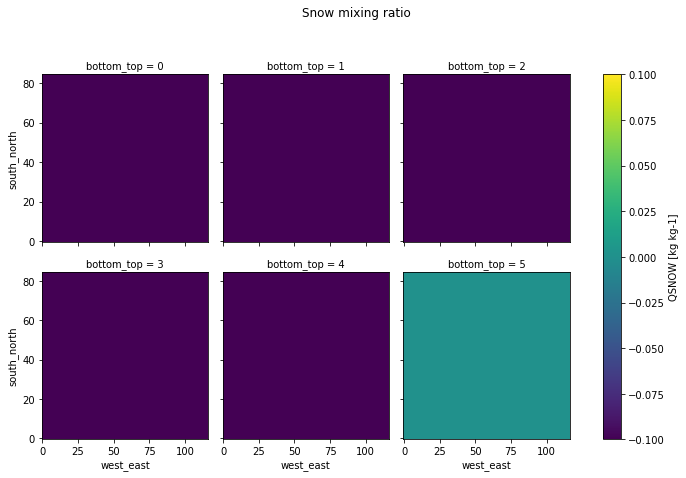

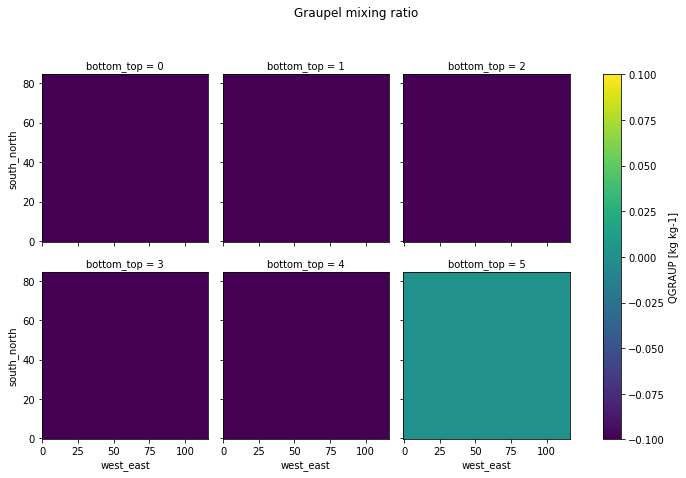

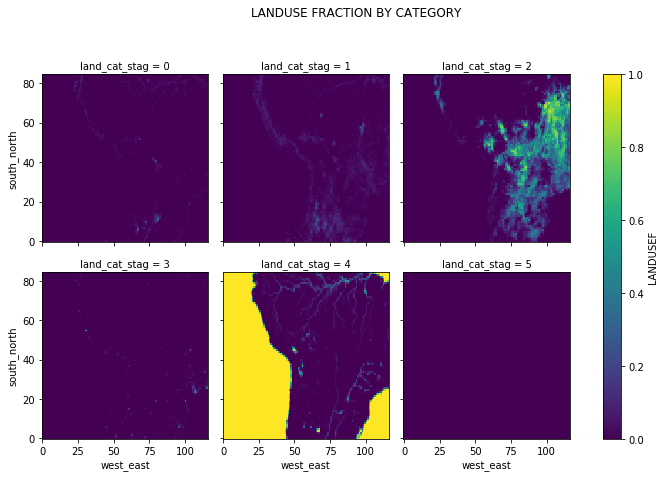

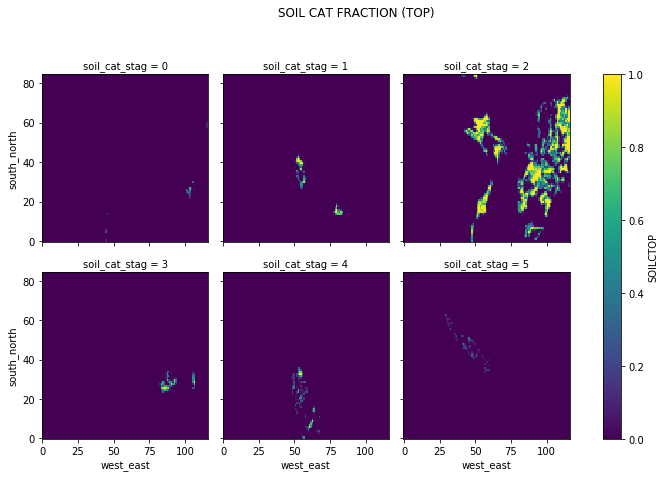

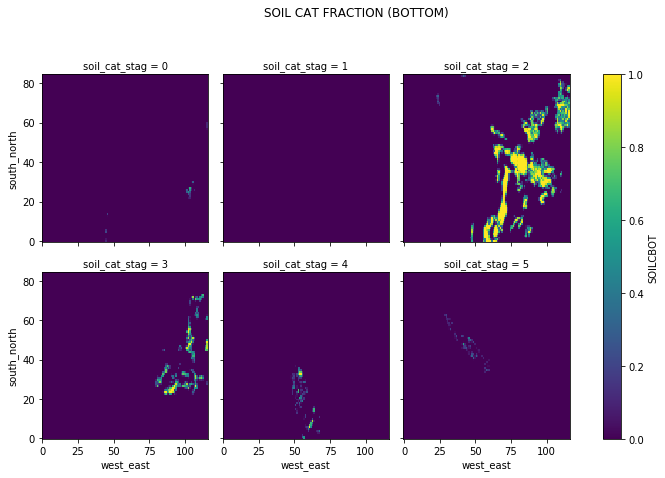

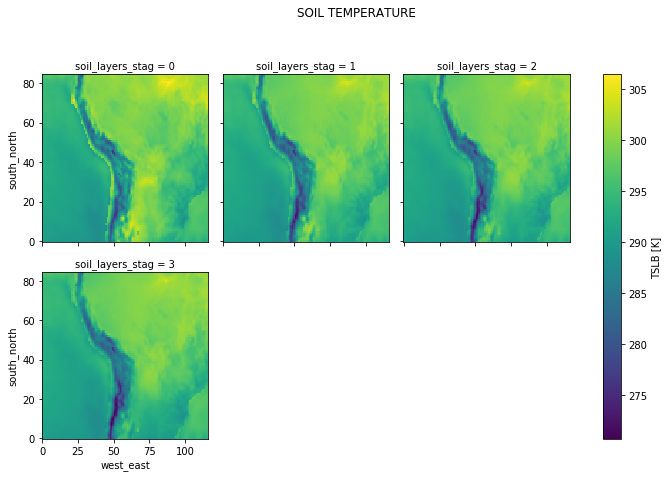

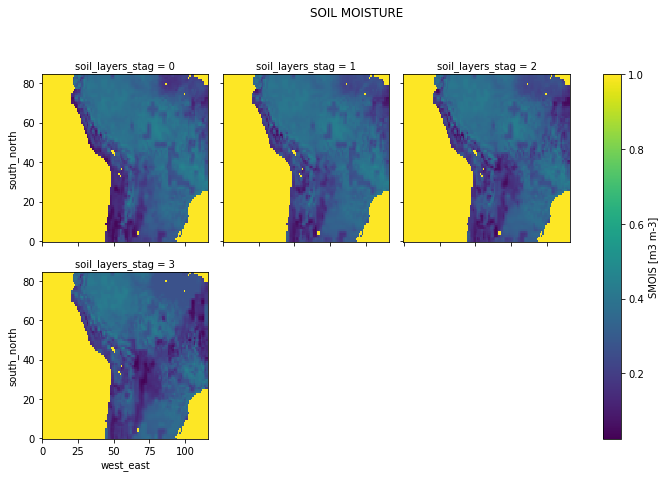

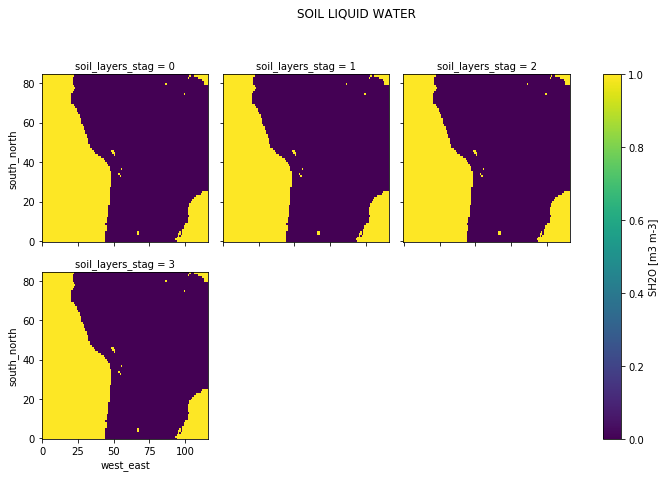

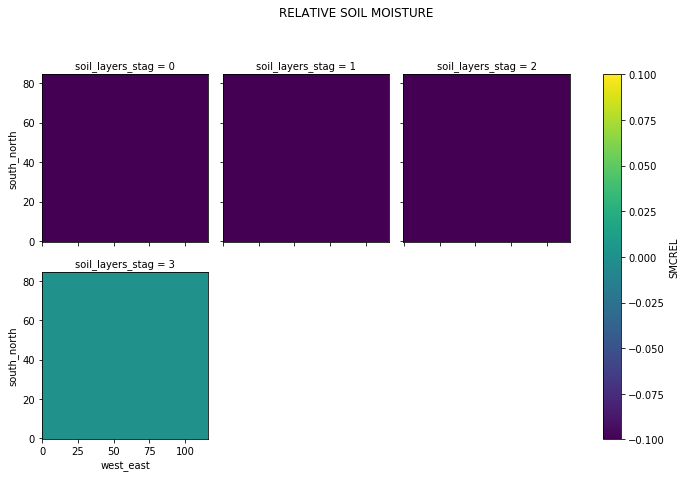

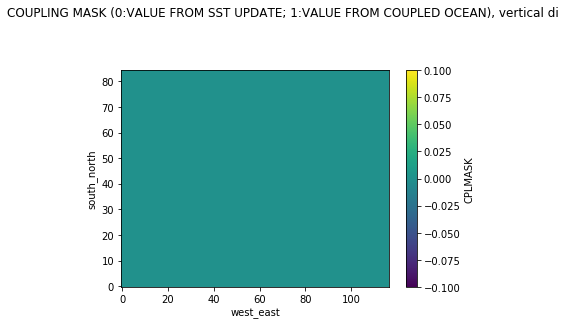

In [122]:
for v in variables:
    ll = len(xa[v].dims)
    if ll==3:
        try: desc = xa[v].description
        except: desc = ''
        dat = xa[v]
        dims = xa[v].dims
        lens = [len(dat[d]) for d in dims]
        dl = pd.DataFrame(lens,dims,['l'])
        id_min = dl.idxmin()[0]
        val_min = dl.loc[id_min][0]
        if val_min ==1:
            fig,ax = plt.subplots()
            dat.plot()
            fig.suptitle(desc,y=1.1)
            
        else:
            if val_min <=6:
                sp = 1
            else:
                sp = int(np.ceil(val_min/6))
            dat = dat.isel(**{id_min:slice(0,None,sp)})
            res = dat.plot(col=id_min,col_wrap=3)
            res.fig.suptitle(desc,y=1.1)
       
        
        
        
